In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import product
import matplotlib.animation 
import numpy as np
import networkx as nx
import copy
import warnings #This is just to suppress any error warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
import csv
import os

cwd = os.getcwd()
print(cwd)

C:\Users\lione\Desktop\Y4S2\PH4421 FYP


In [2]:
# Useful functions
def csv_file_opener(location_file, file_name):
    file_data = []
    open_csv = location_file + file_name + ".csv"
    open_csv = open_csv.replace('\\' , '/')   
    
    with open(open_csv, 'r') as file:
        csvreader = csv.reader(file)
        for row in csvreader:
            file_data.append(row[0:])

    for i in file_data:
        for j in range(len(i)):
            if i[j] == '':
                continue
            else:
                i[j] = float(i[j])
                
    return file_data

In [29]:
location_1a = r'C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Chapter 3 - Stochastic Model (Agent Based Modelling Results)\Part 4 - Comparing different D_recover\Part 4b - R-Num for D_recover = 1, 3, 5 for rl = 9\Excel data'
ER_1a_data = [] 
WS_1a_data = []
BA_1a_data = []

file_names_ER_1a = [r"\Avr real time R-Num for ER Network r_l9 D_rec1", r"\Avr real time R-Num for ER Network r_l9 D_rec3", \
                r"\Avr real time R-Num for ER Network r_l9 D_rec5"]

file_names_WS_1a = [r"\Avr real time R-Num for WS Network r_l9 D_rec1", r"\Avr real time R-Num for WS Network r_l9 D_rec3", \
                r"\Avr real time R-Num for WS Network r_l9 D_rec5"]

file_names_BA_1a = [r"\Avr real time R-Num for BA Network r_l9 D_rec1", r"\Avr real time R-Num for BA Network r_l9 D_rec3", \
                r"\Avr real time R-Num for BA Network r_l9 D_rec5"]
for j in range(3):
    ER_1a_data.append(csv_file_opener(location_1a, file_names_ER_1a[j]))
    WS_1a_data.append(csv_file_opener(location_1a, file_names_WS_1a[j]))
    BA_1a_data.append(csv_file_opener(location_1a, file_names_BA_1a[j]))


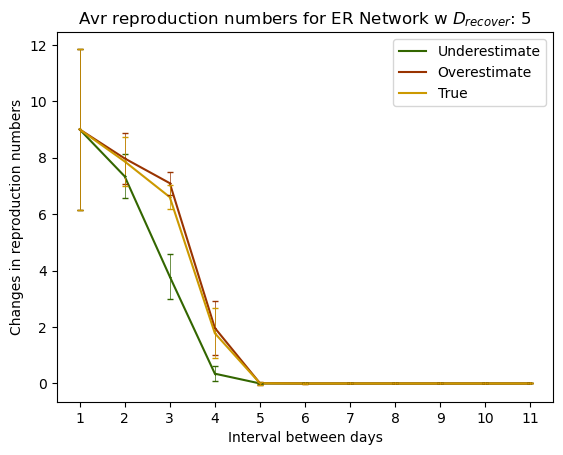

In [41]:
test = [1, 3, 5]
k = 2
######### For ER Network #########
plt.plot(ER_1a_data[k][0], ER_1a_data[k][1], label  = "Underestimate", color = '#336600')
plt.plot(ER_1a_data[k][0], ER_1a_data[k][2], label  = "Overestimate", color = '#993300')
plt.plot(ER_1a_data[k][0], ER_1a_data[k][3], label  = "True", color = '#cc9900')

plt.errorbar(ER_1a_data[k][0], ER_1a_data[k][1], yerr = ER_1a_data[k][4],\
                   fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
plt.errorbar(ER_1a_data[k][0], ER_1a_data[k][2], yerr = ER_1a_data[k][5],\
                   fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
plt.errorbar(ER_1a_data[k][0], ER_1a_data[k][3], yerr = ER_1a_data[k][6],\
                   fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')

plt.xticks(np.arange(1, len(ER_1a_data[k][0])+1, 1))

ER_title_label= "Avr reproduction numbers for ER Network w $D_{recover}$: " + str(test[k])
plt.title(ER_title_label)
plt.xlabel("Interval between days")
plt.ylabel("Changes in reproduction numbers")
plt.legend(loc = 1)
save_fig_str = 'ER_D_recover'+str(test[k])+'.png'
plt.savefig(save_fig_str, dpi = 500)
plt.show()

In [85]:
# plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
# test = [3, 5, 7, 9]

# for k in range(4):
#     label = '$r_T$ for $r_l$:' + str(test[k])
#     plt.plot(BA_1a_data[k][0], BA_1a_data[k][3], label  = label, color = plot_colors[k])
#     plt.errorbar(BA_1a_data[k][0], BA_1a_data[k][3], yerr = BA_1a_data[k][6],\
#                    fmt = 'o', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])
    
    
# ER_title_label= "Avr $r_T$ for BA Network"  
# plt.title(ER_title_label)
# plt.xlabel("Interval between days")
# plt.ylabel("Changes in reproduction numbers")   
# plt.xticks(np.arange(1, 17, 1))
# plt.legend()
# plt.savefig('BA network r_T comparsion.png', dpi = 500)
# plt.show()

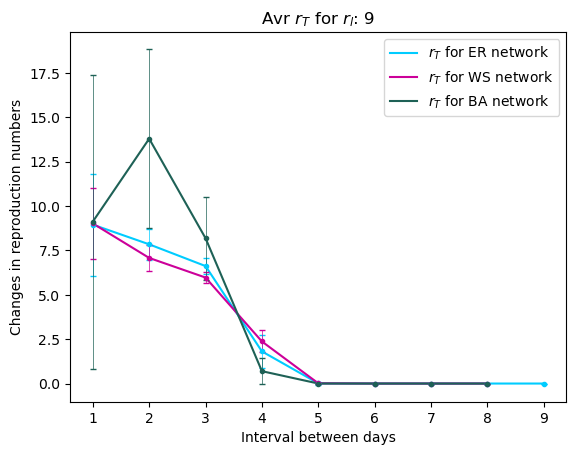

In [107]:
plot_colors = ['#00ccff', '#cc0099', '#1e6156'] 
test = [3, 5, 7, 9]
k = 3
label_ER = '$r_T$ for ER network'
plt.plot(ER_1a_data[k][0], ER_1a_data[k][3], label  = label_ER, color = plot_colors[0])
plt.errorbar(ER_1a_data[k][0], ER_1a_data[k][3], yerr = ER_1a_data[k][6],\
               fmt = 'o', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[0])

label_WS = '$r_T$ for WS network'
plt.plot(WS_1a_data[k][0], WS_1a_data[k][3], label  = label_WS, color = plot_colors[1])
plt.errorbar(WS_1a_data[k][0], WS_1a_data[k][3], yerr = WS_1a_data[k][6],\
               fmt = 'o', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[1])

label_BA = '$r_T$ for BA network'
plt.plot(BA_1a_data[k][0], BA_1a_data[k][3], label  = label_BA, color = plot_colors[2])
plt.errorbar(BA_1a_data[k][0], BA_1a_data[k][3], yerr = BA_1a_data[k][6],\
               fmt = 'o', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[2])


    
    
ER_title_label= "Avr $r_T$ for $r_l$: " + str(test[k])  
plt.title(ER_title_label)
plt.xlabel("Interval between days")
plt.ylabel("Changes in reproduction numbers")   
plt.xticks(np.arange(1, 10, 1))
plt.legend()
plt.savefig('Avr r_T for r = 9.png', dpi = 500)
plt.show()

#### <u> Part 1(a), $r_l$ = 3, $D_{recover}$ = 3 & $I_0$ = 1, for the set of $r_{sc}$</u>

In [5]:
location_1a = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (1) Comparing rl = 3 & 9 for SC = 0.5, 0.75,1 for D = 3 [Show failure of SC]\rl=3 test diff r_tri D = 3"
ER_1a_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_1a_data = []
BA_1a_data = []

file_names_ER_1a = ["\ER_avr_simplex_rl3_r_tri_none", "\ER_avr_simplex_rl3_r_tri_0.5", \
                "\ER_avr_simplex_rl3_r_tri_0.75", "\ER_avr_simplex_rl3_r_tri_1"]

file_names_WS_1a = ["\WS_avr_simplex_rl3_r_tri_none", "\WS_avr_simplex_rl3_r_tri_0.5", \
                "\WS_avr_simplex_rl3_r_tri_0.75", "\WS_avr_simplex_rl3_r_tri_1"]

file_names_BA_1a = ["\BA_avr_simplex_rl3_r_tri_none", "\BA_avr_simplex_rl3_r_tri_0.5", \
                "\BA_avr_simplex_rl3_r_tri_0.75", "\BA_avr_simplex_rl3_r_tri_1"]

for j in range(4):
    ER_1a_data.append(csv_file_opener(location_1a, file_names_ER_1a[j]))
    WS_1a_data.append(csv_file_opener(location_1a, file_names_WS_1a[j]))
    BA_1a_data.append(csv_file_opener(location_1a, file_names_BA_1a[j]))

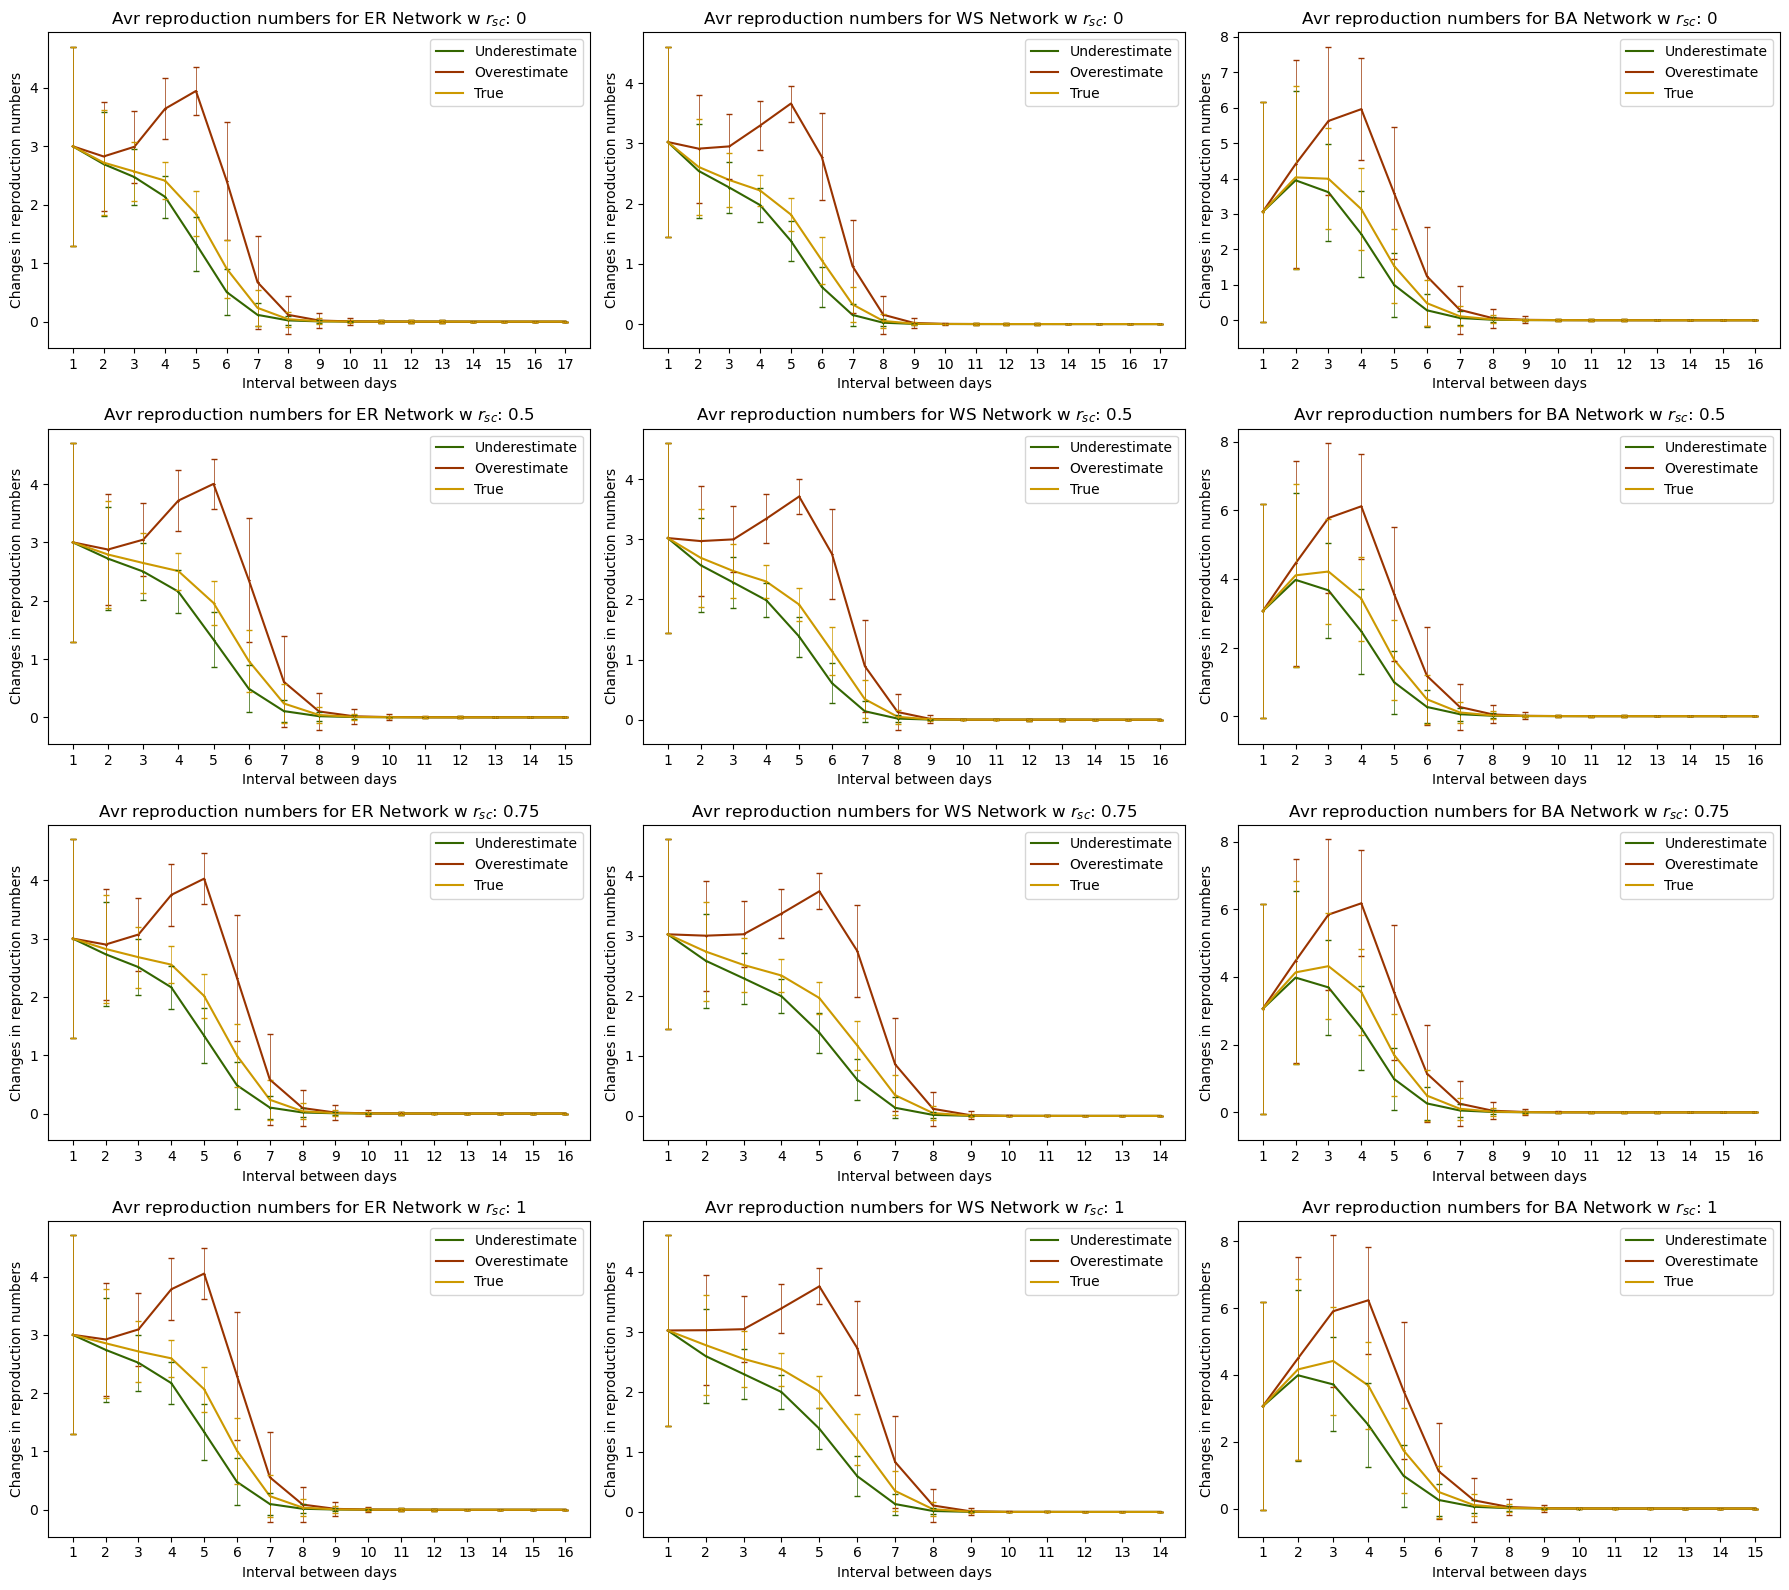

In [6]:
# 1a. Plot individual graphs with diff r triangle. 

fig, axs = plt.subplots(4, 3, figsize = (18,16))

for k in range(4):
    ######### For ER Network #########
    axs[k][0].plot(ER_1a_data[k][0], ER_1a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][0].plot(ER_1a_data[k][0], ER_1a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][0].plot(ER_1a_data[k][0], ER_1a_data[k][3], label  = "True", color = '#cc9900')
    
    axs[k][0].errorbar(ER_1a_data[k][0], ER_1a_data[k][1], yerr = ER_1a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][0].errorbar(ER_1a_data[k][0], ER_1a_data[k][2], yerr = ER_1a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][0].errorbar(ER_1a_data[k][0], ER_1a_data[k][3], yerr = ER_1a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][0].set_xticks(np.arange(1, len(ER_1a_data[k][0])+1, 1))
    
    ER_title_label= "Avr reproduction numbers for ER Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][0].set_title(ER_title_label)
    axs[k][0].set_xlabel("Interval between days")
    axs[k][0].set_ylabel("Changes in reproduction numbers")
    axs[k][0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[k][1].plot(WS_1a_data[k][0], WS_1a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][1].plot(WS_1a_data[k][0], WS_1a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][1].plot(WS_1a_data[k][0], WS_1a_data[k][3], label  = "True", color = '#cc9900')

    axs[k][1].errorbar(WS_1a_data[k][0], WS_1a_data[k][1], yerr = WS_1a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][1].errorbar(WS_1a_data[k][0], WS_1a_data[k][2], yerr = WS_1a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][1].errorbar(WS_1a_data[k][0], WS_1a_data[k][3], yerr = WS_1a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][1].set_xticks(np.arange(1, len(WS_1a_data[k][0])+1, 1))
    
    WS_title_label= "Avr reproduction numbers for WS Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][1].set_title(WS_title_label)
    axs[k][1].set_xlabel("Interval between days")
    axs[k][1].set_ylabel("Changes in reproduction numbers")
    axs[k][1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[k][2].plot(BA_1a_data[k][0], BA_1a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][2].plot(BA_1a_data[k][0], BA_1a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][2].plot(BA_1a_data[k][0], BA_1a_data[k][3], label  = "True", color = '#cc9900')

    axs[k][2].errorbar(BA_1a_data[k][0], BA_1a_data[k][1], yerr = BA_1a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][2].errorbar(BA_1a_data[k][0], BA_1a_data[k][2], yerr = BA_1a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][2].errorbar(BA_1a_data[k][0], BA_1a_data[k][3], yerr = BA_1a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][2].set_xticks(np.arange(1, len(BA_1a_data[k][0])+1, 1))
    
    BA_title_label= "Avr reproduction numbers for BA Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][2].set_title(BA_title_label)
    axs[k][2].set_xlabel("Interval between days")
    axs[k][2].set_ylabel("Changes in reproduction numbers")
    axs[k][2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

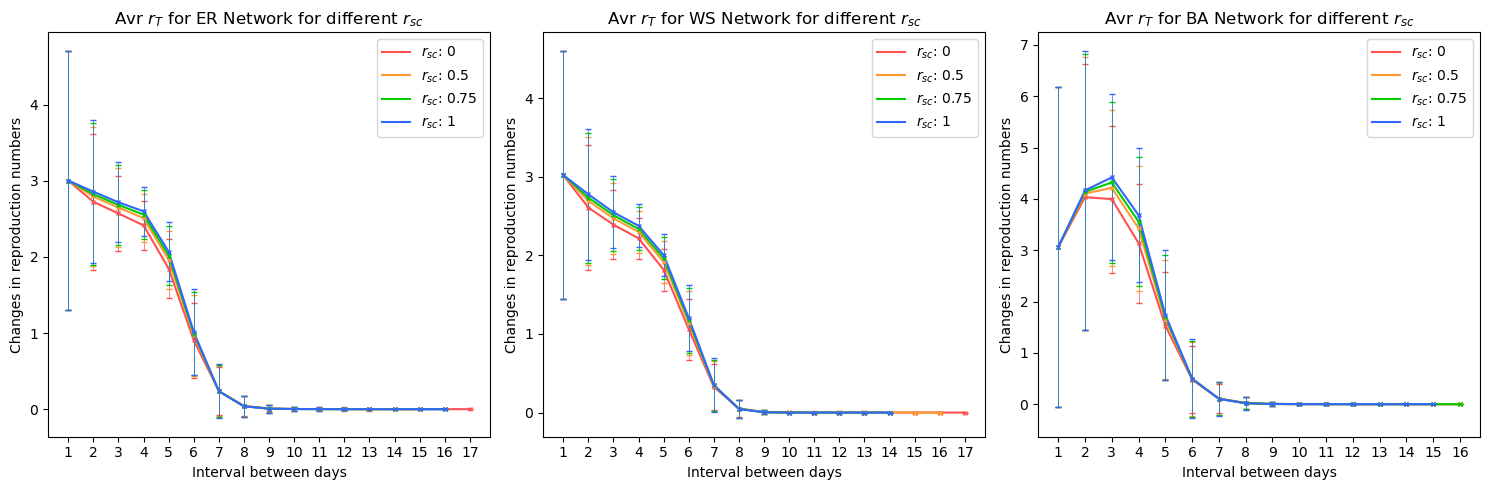

In [7]:
# 1a. Plot only r_T for each network and compare between networks
fig, axs = plt.subplots(1, 3, figsize = (15,5))
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
T_end_ER = max(len(ER_1a_data[0][0]), len(ER_1a_data[1][0]), len(ER_1a_data[2][0]), len(ER_1a_data[3][0]))
T_end_WS = max(len(WS_1a_data[0][0]), len(WS_1a_data[1][0]), len(WS_1a_data[2][0]), len(WS_1a_data[3][0]))
T_end_BA = max(len(BA_1a_data[0][0]), len(BA_1a_data[1][0]), len(BA_1a_data[2][0]), len(BA_1a_data[3][0]))

for k in range(4):
    plot_label = "$r_{sc}$: "+ str(r_triangle_set[k]) 
    ######### For ER Network #########
    axs[0].plot(ER_1a_data[k][0], ER_1a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[0].errorbar(ER_1a_data[k][0], ER_1a_data[k][3], yerr = ER_1a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k]) 
    
    axs[0].set_xticks(np.arange(1, T_end_ER + 1, 1))
    
    ER_title_label= "Avr $r_T$ for ER Network for different $r_{sc}$"   
    axs[0].set_title(ER_title_label)
    axs[0].set_xlabel("Interval between days")
    axs[0].set_ylabel("Changes in reproduction numbers")
    axs[0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[1].plot(WS_1a_data[k][0], WS_1a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[1].errorbar(WS_1a_data[k][0], WS_1a_data[k][3], yerr = WS_1a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[1].set_xticks(np.arange(1, T_end_WS + 1, 1))
    
    WS_title_label= "Avr $r_T$ for WS Network for different $r_{sc}$"   
    axs[1].set_title(WS_title_label)
    axs[1].set_xlabel("Interval between days")
    axs[1].set_ylabel("Changes in reproduction numbers")
    axs[1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[2].plot(BA_1a_data[k][0], BA_1a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[2].errorbar(BA_1a_data[k][0], BA_1a_data[k][3], yerr = BA_1a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[2].set_xticks(np.arange(1, T_end_BA + 1, 1))
    
    BA_title_label= "Avr $r_T$ for BA Network for different $r_{sc}$"   
    axs[2].set_title(BA_title_label)
    axs[2].set_xlabel("Interval between days")
    axs[2].set_ylabel("Changes in reproduction numbers")
    axs[2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

#### <u> Part 1(b), $r_l$ = 9, $D_{recover}$ = 3 & $I_0$ = 1, for the set of $r_{sc}$</u>

In [8]:
location_1b = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (1) Comparing rl = 3 & 9 for SC = 0.5, 0.75,1 for D = 3 [Show failure of SC]\rl=9 test diff r_tri D = 3"
ER_1b_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_1b_data = []
BA_1b_data = []

file_names_ER_1b = ["\ER_avr_simplex_rl9_r_tri_none", "\ER_avr_simplex_rl9_r_tri_0.5", \
                "\ER_avr_simplex_rl9_r_tri_0.75", "\ER_avr_simplex_rl9_r_tri_1"]

file_names_WS_1b = ["\WS_avr_simplex_rl9_r_tri_none", "\WS_avr_simplex_rl9_r_tri_0.5", \
                "\WS_avr_simplex_rl9_r_tri_0.75", "\WS_avr_simplex_rl9_r_tri_1"]

file_names_BA_1b = ["\BA_avr_simplex_rl9_r_tri_none", "\BA_avr_simplex_rl9_r_tri_0.5", \
                "\BA_avr_simplex_rl9_r_tri_0.75", "\BA_avr_simplex_rl9_r_tri_1"]

for j in range(4):
    ER_1b_data.append(csv_file_opener(location_1b, file_names_ER_1b[j]))
    WS_1b_data.append(csv_file_opener(location_1b, file_names_WS_1b[j]))
    BA_1b_data.append(csv_file_opener(location_1b, file_names_BA_1b[j]))

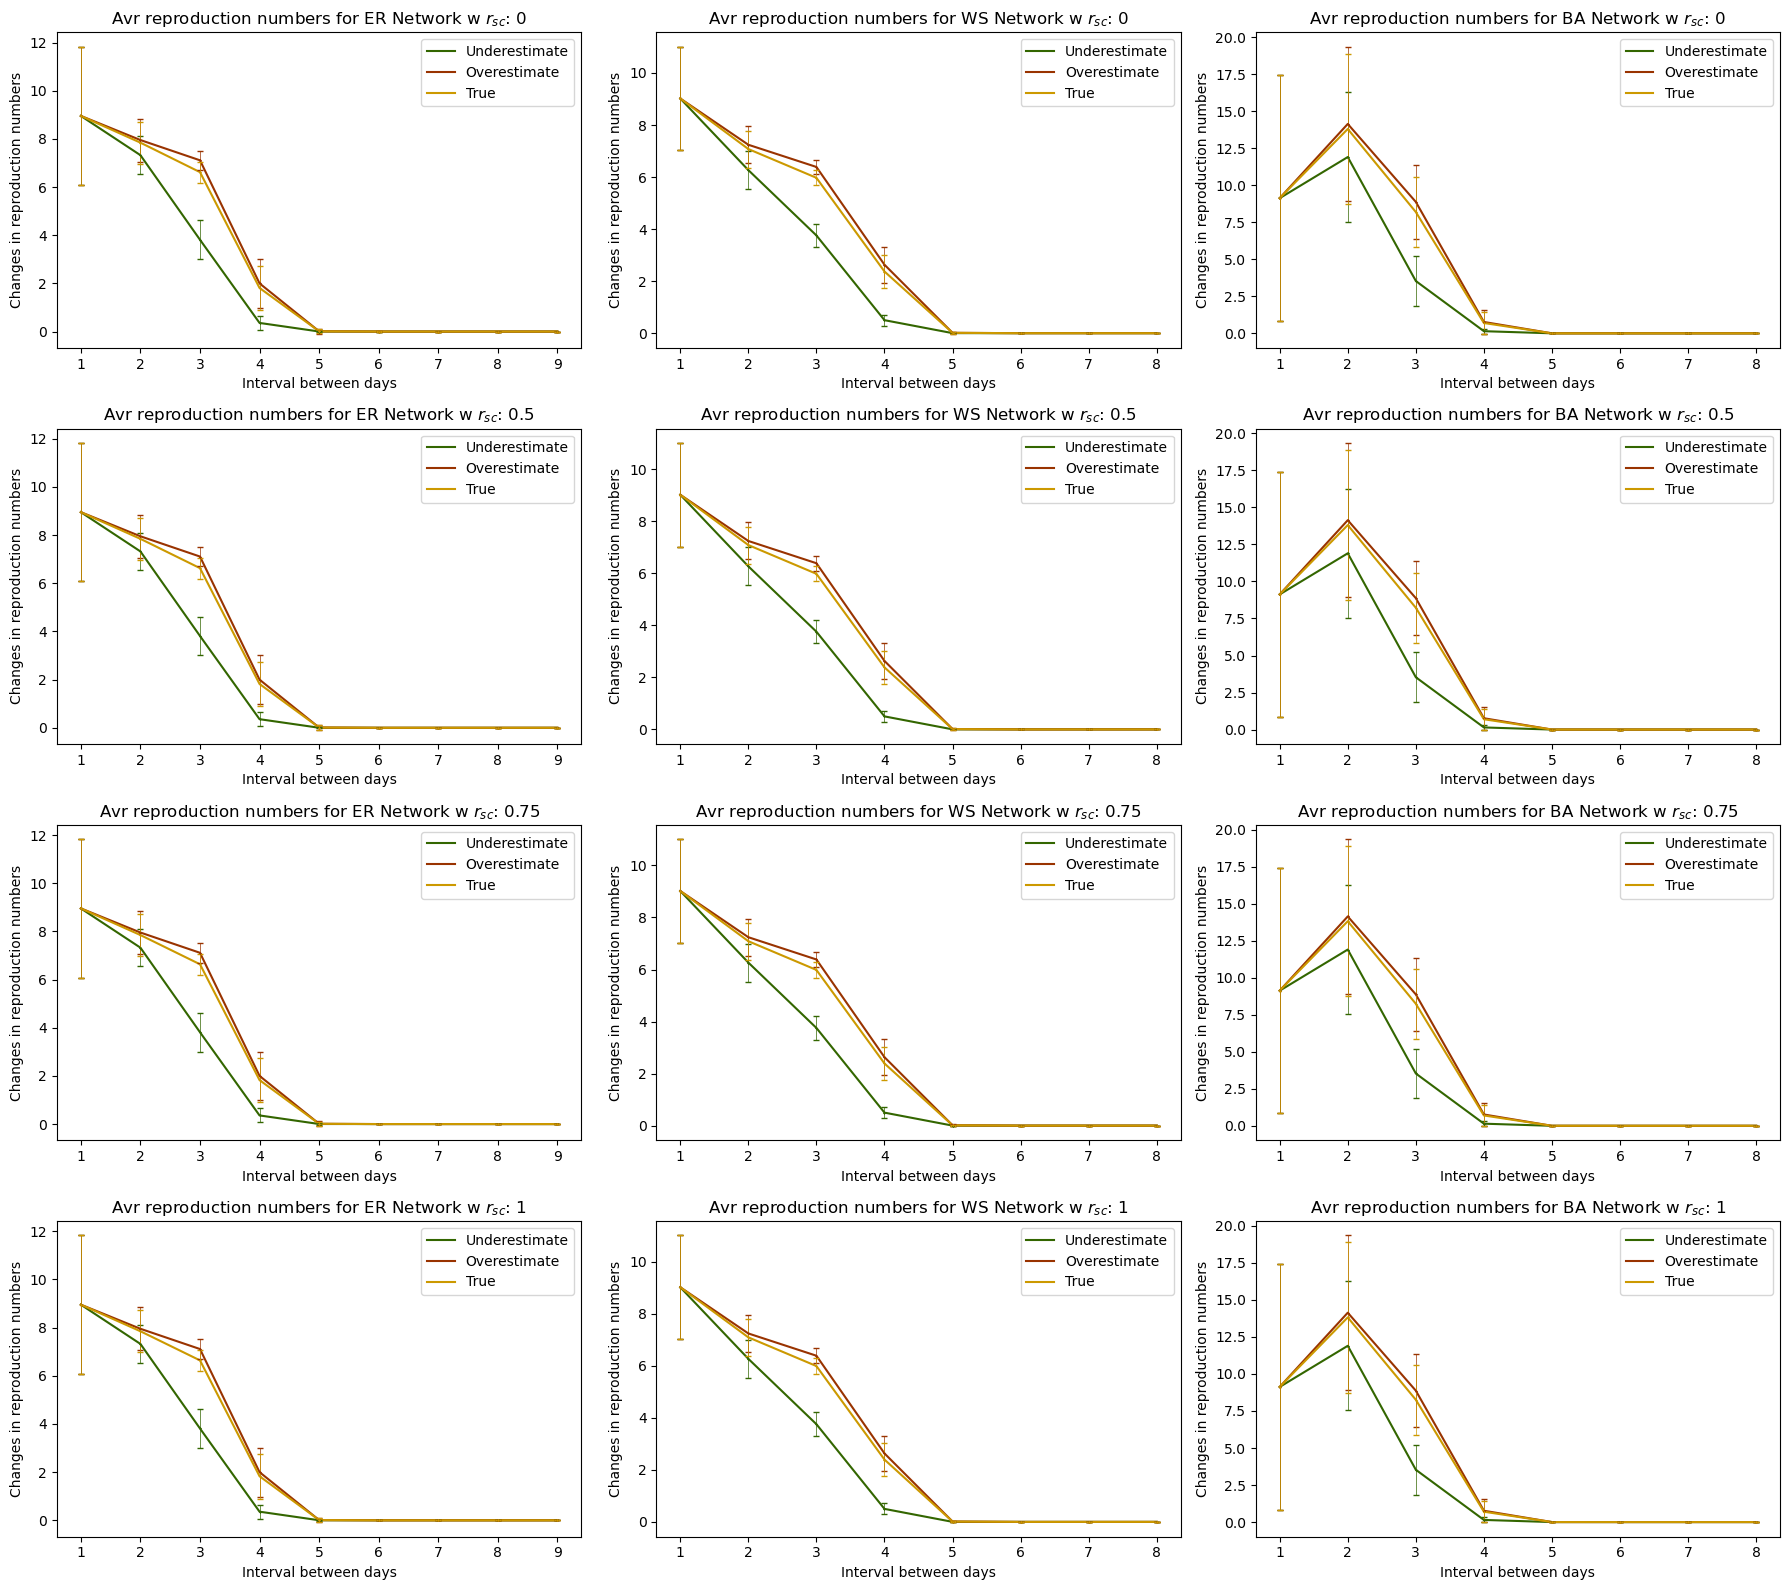

In [9]:
# 1b. Plot individual graphs with diff r triangle. 

fig, axs = plt.subplots(4, 3, figsize = (18,16))

for k in range(4):
    ######### For ER Network #########
    axs[k][0].plot(ER_1b_data[k][0], ER_1b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][0].plot(ER_1b_data[k][0], ER_1b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][0].plot(ER_1b_data[k][0], ER_1b_data[k][3], label  = "True", color = '#cc9900')
    
    axs[k][0].errorbar(ER_1b_data[k][0], ER_1b_data[k][1], yerr = ER_1b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][0].errorbar(ER_1b_data[k][0], ER_1b_data[k][2], yerr = ER_1b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][0].errorbar(ER_1b_data[k][0], ER_1b_data[k][3], yerr = ER_1b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][0].set_xticks(np.arange(1, len(ER_1b_data[k][0])+1, 1))
    
    ER_title_label= "Avr reproduction numbers for ER Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][0].set_title(ER_title_label)
    axs[k][0].set_xlabel("Interval between days")
    axs[k][0].set_ylabel("Changes in reproduction numbers")
    axs[k][0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[k][1].plot(WS_1b_data[k][0], WS_1b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][1].plot(WS_1b_data[k][0], WS_1b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][1].plot(WS_1b_data[k][0], WS_1b_data[k][3], label  = "True", color = '#cc9900')

    axs[k][1].errorbar(WS_1b_data[k][0], WS_1b_data[k][1], yerr = WS_1b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][1].errorbar(WS_1b_data[k][0], WS_1b_data[k][2], yerr = WS_1b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][1].errorbar(WS_1b_data[k][0], WS_1b_data[k][3], yerr = WS_1b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][1].set_xticks(np.arange(1, len(WS_1b_data[k][0])+1, 1))
    
    WS_title_label= "Avr reproduction numbers for WS Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][1].set_title(WS_title_label)
    axs[k][1].set_xlabel("Interval between days")
    axs[k][1].set_ylabel("Changes in reproduction numbers")
    axs[k][1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[k][2].plot(BA_1b_data[k][0], BA_1b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][2].plot(BA_1b_data[k][0], BA_1b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][2].plot(BA_1b_data[k][0], BA_1b_data[k][3], label  = "True", color = '#cc9900')

    axs[k][2].errorbar(BA_1b_data[k][0], BA_1b_data[k][1], yerr = BA_1b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][2].errorbar(BA_1b_data[k][0], BA_1b_data[k][2], yerr = BA_1b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][2].errorbar(BA_1b_data[k][0], BA_1b_data[k][3], yerr = BA_1b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][2].set_xticks(np.arange(1, len(BA_1b_data[k][0])+1, 1))
    
    BA_title_label= "Avr reproduction numbers for BA Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][2].set_title(BA_title_label)
    axs[k][2].set_xlabel("Interval between days")
    axs[k][2].set_ylabel("Changes in reproduction numbers")
    axs[k][2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

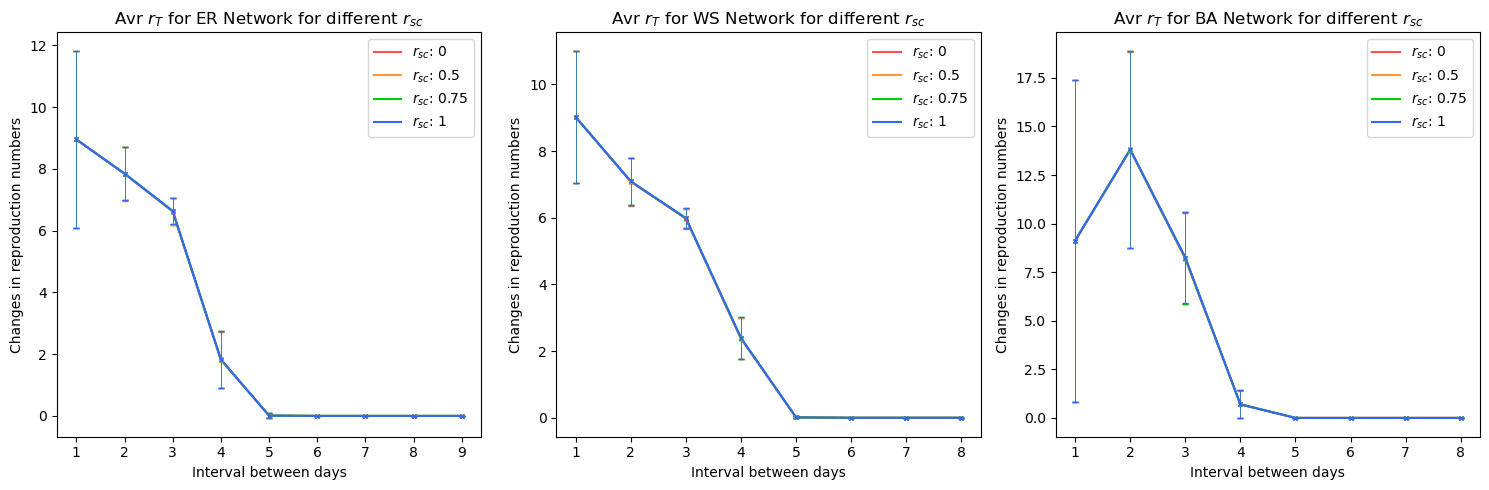

In [10]:
# 1b. Plot only r_T for each network and compare between networks
fig, axs = plt.subplots(1, 3, figsize = (15,5))
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
T_end_ER = max(len(ER_1b_data[0][0]), len(ER_1b_data[1][0]), len(ER_1b_data[2][0]), len(ER_1b_data[3][0]))
T_end_WS = max(len(WS_1b_data[0][0]), len(WS_1b_data[1][0]), len(WS_1b_data[2][0]), len(WS_1b_data[3][0]))
T_end_BA = max(len(BA_1b_data[0][0]), len(BA_1b_data[1][0]), len(BA_1b_data[2][0]), len(BA_1b_data[3][0]))

for k in range(4):
    plot_label = "$r_{sc}$: "+ str(r_triangle_set[k]) 
    ######### For ER Network #########
    axs[0].plot(ER_1b_data[k][0], ER_1b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[0].errorbar(ER_1b_data[k][0], ER_1b_data[k][3], yerr = ER_1b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k]) 
    
    axs[0].set_xticks(np.arange(1, T_end_ER + 1, 1))
    
    ER_title_label= "Avr $r_T$ for ER Network for different $r_{sc}$"   
    axs[0].set_title(ER_title_label)
    axs[0].set_xlabel("Interval between days")
    axs[0].set_ylabel("Changes in reproduction numbers")
    axs[0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[1].plot(WS_1b_data[k][0], WS_1b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[1].errorbar(WS_1b_data[k][0], WS_1b_data[k][3], yerr = WS_1b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[1].set_xticks(np.arange(1, T_end_WS + 1, 1))
    
    WS_title_label= "Avr $r_T$ for WS Network for different $r_{sc}$"   
    axs[1].set_title(WS_title_label)
    axs[1].set_xlabel("Interval between days")
    axs[1].set_ylabel("Changes in reproduction numbers")
    axs[1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[2].plot(BA_1b_data[k][0], BA_1b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[2].errorbar(BA_1b_data[k][0], BA_1b_data[k][3], yerr = BA_1b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[2].set_xticks(np.arange(1, T_end_BA + 1, 1))
    
    BA_title_label= "Avr $r_T$ for BA Network for different $r_{sc}$"   
    axs[2].set_title(BA_title_label)
    axs[2].set_xlabel("Interval between days")
    axs[2].set_ylabel("Changes in reproduction numbers")
    axs[2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

#### <u> Part 2(a) Larger effect by SC: $r_l$ = 2, $D_{recover}$ = 3 & $I_0$ = 1, for the set of $r_{sc}$</u>
Here we reduce transmissibility of pairwise transmission

In [11]:
location_2a = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (2) Comparing rl = 1 & 2 for SC = 0.5, 0.75, 1 for D = 3 [Show success of SC]\TO USE rl = 2 test diff r_tri D = 3"
ER_2a_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_2a_data = []
BA_2a_data = []

file_names_ER_2a = ["\ER_avr_simplex_rl2_r_tri_none", "\ER_avr_simplex_rl2_r_tri_0.5", \
                "\ER_avr_simplex_rl2_r_tri_0.75", "\ER_avr_simplex_rl2_r_tri_1"]

file_names_WS_2a = ["\WS_avr_simplex_rl2_r_tri_none", "\WS_avr_simplex_rl2_r_tri_0.5", \
                "\WS_avr_simplex_rl2_r_tri_0.75", "\WS_avr_simplex_rl2_r_tri_1"]

file_names_BA_2a = ["\BA_avr_simplex_rl2_r_tri_none", "\BA_avr_simplex_rl2_r_tri_0.5", \
                "\BA_avr_simplex_rl2_r_tri_0.75", "\BA_avr_simplex_rl2_r_tri_1"]

for j in range(4):
    ER_2a_data.append(csv_file_opener(location_2a, file_names_ER_2a[j]))
    WS_2a_data.append(csv_file_opener(location_2a, file_names_WS_2a[j]))
    BA_2a_data.append(csv_file_opener(location_2a, file_names_BA_2a[j]))

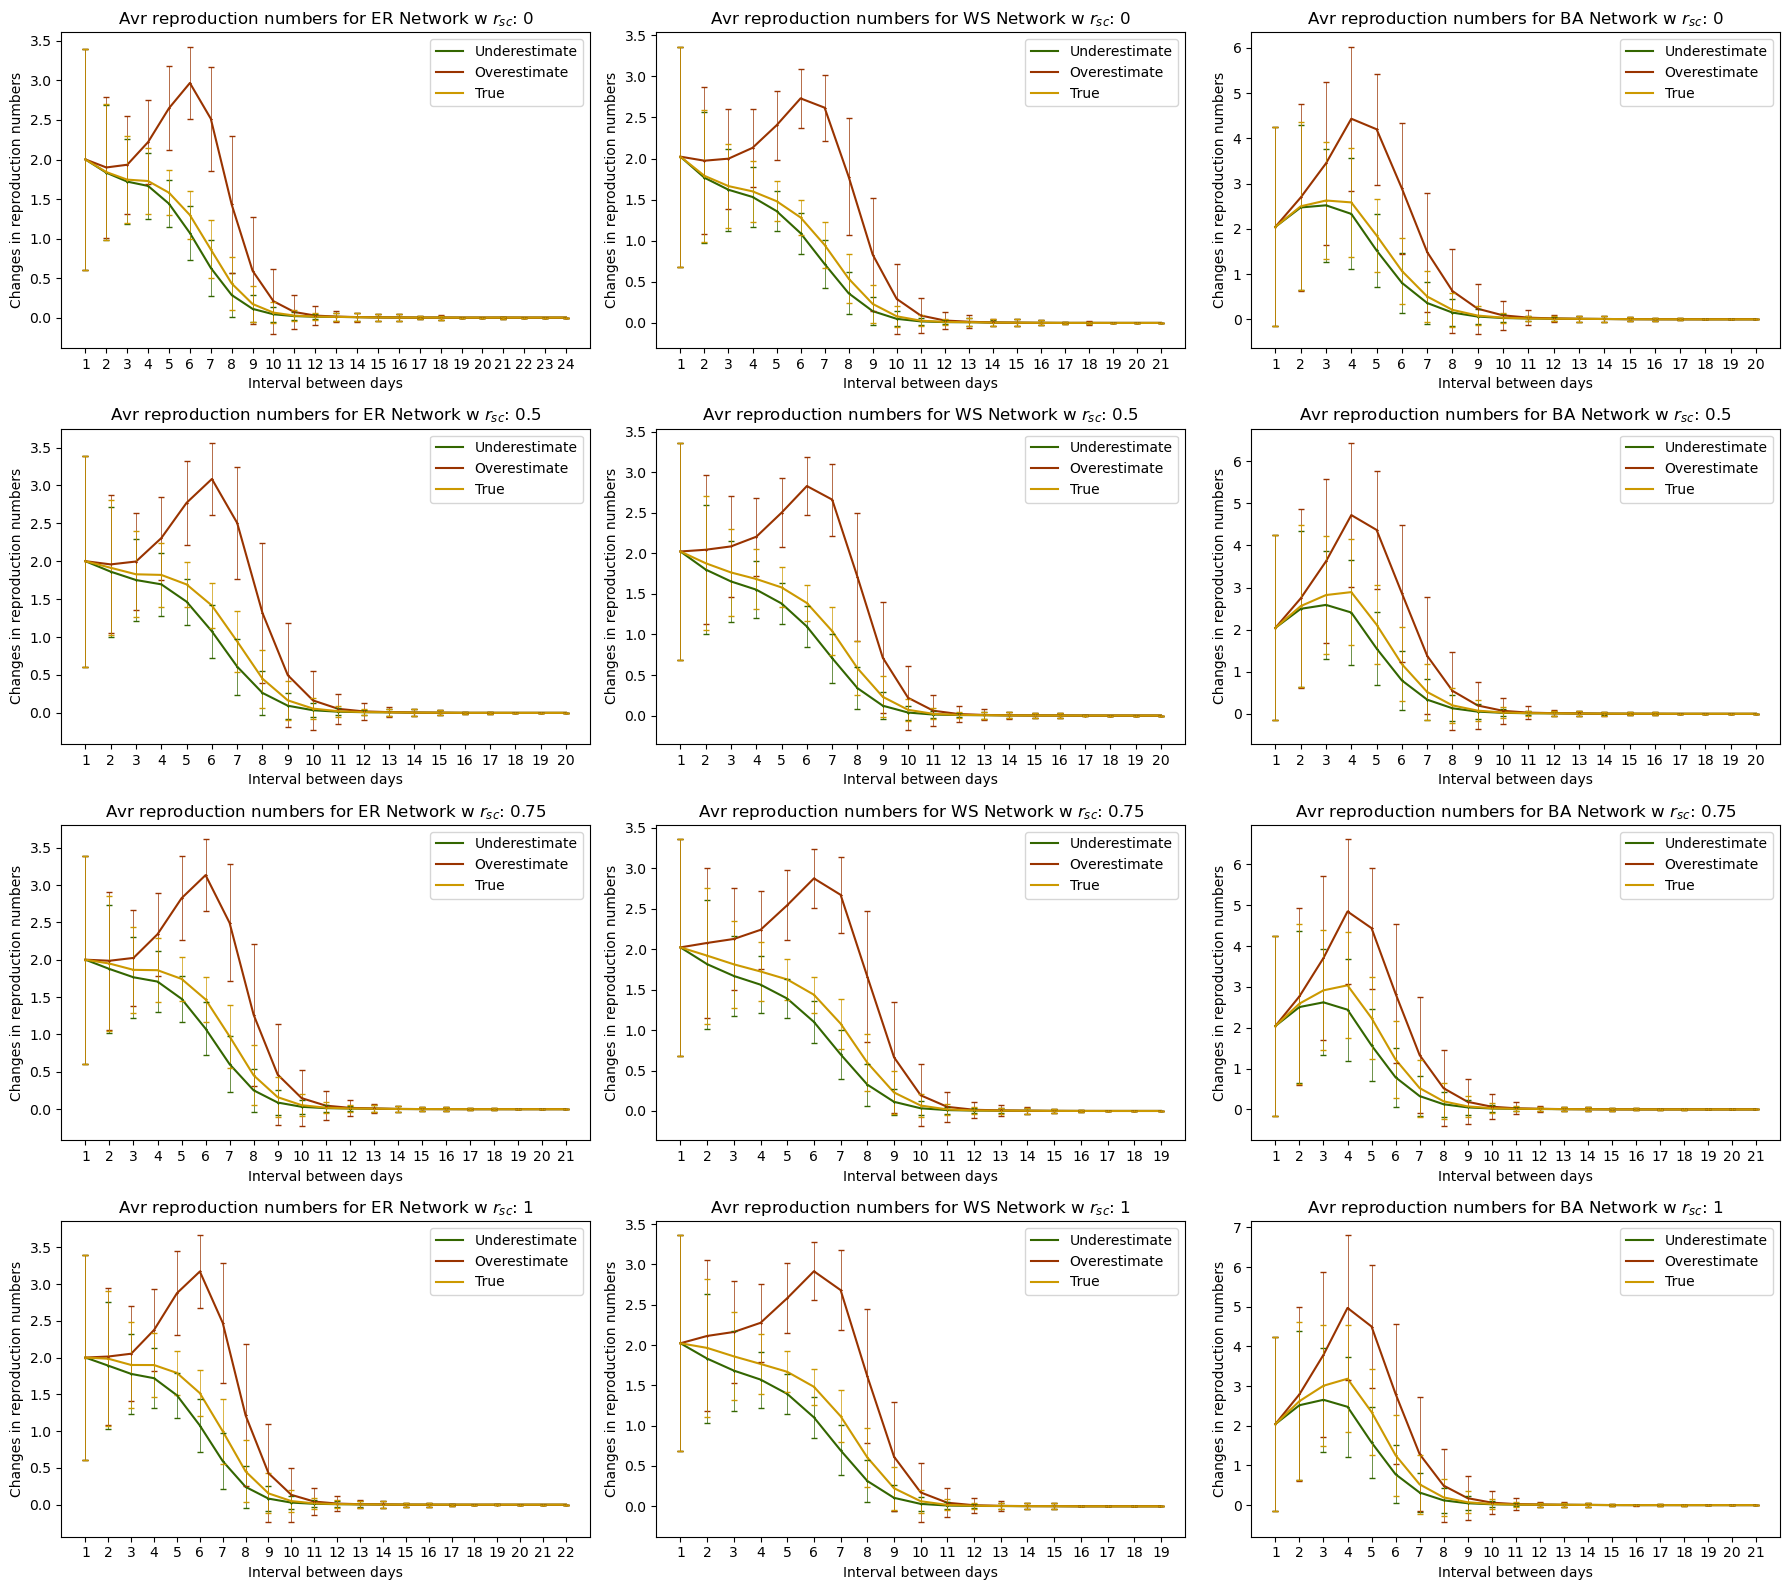

In [12]:
# 2a. Plot individual graphs with diff r triangle. 

fig, axs = plt.subplots(4, 3, figsize = (18,16))

for k in range(4):
    ######### For ER Network #########
    axs[k][0].plot(ER_2a_data[k][0], ER_2a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][0].plot(ER_2a_data[k][0], ER_2a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][0].plot(ER_2a_data[k][0], ER_2a_data[k][3], label  = "True", color = '#cc9900')
    
    axs[k][0].errorbar(ER_2a_data[k][0], ER_2a_data[k][1], yerr = ER_2a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][0].errorbar(ER_2a_data[k][0], ER_2a_data[k][2], yerr = ER_2a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][0].errorbar(ER_2a_data[k][0], ER_2a_data[k][3], yerr = ER_2a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][0].set_xticks(np.arange(1, len(ER_2a_data[k][0])+1, 1))
    
    ER_title_label= "Avr reproduction numbers for ER Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][0].set_title(ER_title_label)
    axs[k][0].set_xlabel("Interval between days")
    axs[k][0].set_ylabel("Changes in reproduction numbers")
    axs[k][0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[k][1].plot(WS_2a_data[k][0], WS_2a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][1].plot(WS_2a_data[k][0], WS_2a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][1].plot(WS_2a_data[k][0], WS_2a_data[k][3], label  = "True", color = '#cc9900')

    axs[k][1].errorbar(WS_2a_data[k][0], WS_2a_data[k][1], yerr = WS_2a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][1].errorbar(WS_2a_data[k][0], WS_2a_data[k][2], yerr = WS_2a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][1].errorbar(WS_2a_data[k][0], WS_2a_data[k][3], yerr = WS_2a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][1].set_xticks(np.arange(1, len(WS_2a_data[k][0])+1, 1))
    
    WS_title_label= "Avr reproduction numbers for WS Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][1].set_title(WS_title_label)
    axs[k][1].set_xlabel("Interval between days")
    axs[k][1].set_ylabel("Changes in reproduction numbers")
    axs[k][1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[k][2].plot(BA_2a_data[k][0], BA_2a_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][2].plot(BA_2a_data[k][0], BA_2a_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][2].plot(BA_2a_data[k][0], BA_2a_data[k][3], label  = "True", color = '#cc9900')

    axs[k][2].errorbar(BA_2a_data[k][0], BA_2a_data[k][1], yerr = BA_2a_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][2].errorbar(BA_2a_data[k][0], BA_2a_data[k][2], yerr = BA_2a_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][2].errorbar(BA_2a_data[k][0], BA_2a_data[k][3], yerr = BA_2a_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][2].set_xticks(np.arange(1, len(BA_2a_data[k][0])+1, 1))
    
    BA_title_label= "Avr reproduction numbers for BA Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][2].set_title(BA_title_label)
    axs[k][2].set_xlabel("Interval between days")
    axs[k][2].set_ylabel("Changes in reproduction numbers")
    axs[k][2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

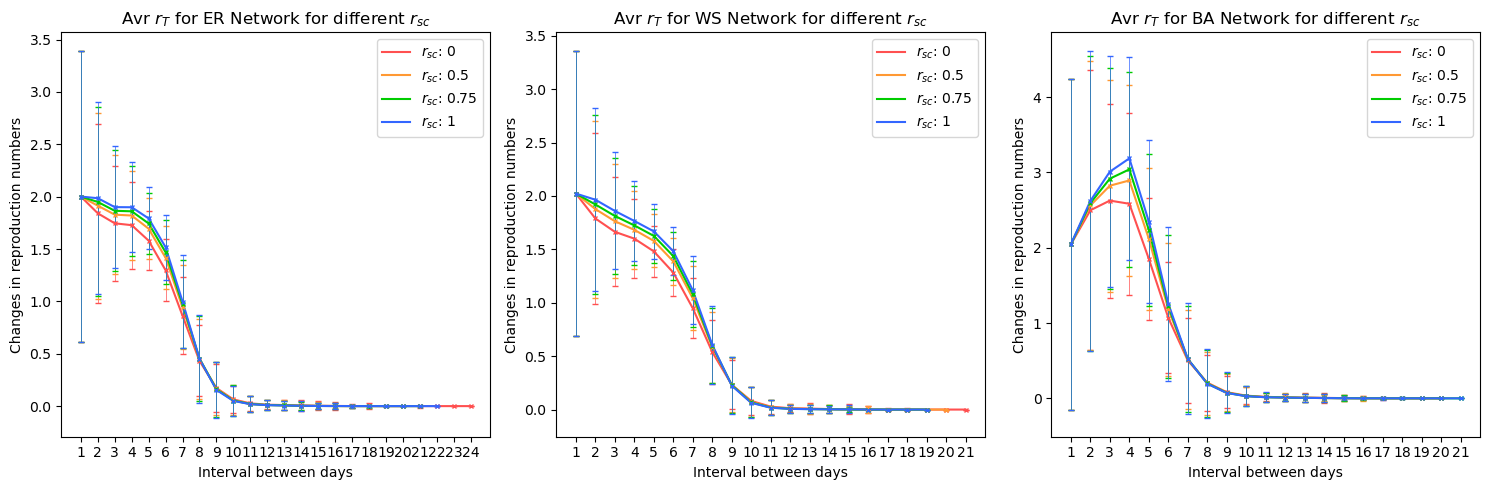

In [13]:
# 2a. Plot only r_T for each network and compare between networks
fig, axs = plt.subplots(1, 3, figsize = (15,5))
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
T_end_ER = max(len(ER_2a_data[0][0]), len(ER_2a_data[1][0]), len(ER_2a_data[2][0]), len(ER_2a_data[3][0]))
T_end_WS = max(len(WS_2a_data[0][0]), len(WS_2a_data[1][0]), len(WS_2a_data[2][0]), len(WS_2a_data[3][0]))
T_end_BA = max(len(BA_2a_data[0][0]), len(BA_2a_data[1][0]), len(BA_2a_data[2][0]), len(BA_2a_data[3][0]))

for k in range(4):
    plot_label = "$r_{sc}$: "+ str(r_triangle_set[k]) 
    ######### For ER Network #########
    axs[0].plot(ER_2a_data[k][0], ER_2a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[0].errorbar(ER_2a_data[k][0], ER_2a_data[k][3], yerr = ER_2a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k]) 
    
    axs[0].set_xticks(np.arange(1, T_end_ER + 1, 1))
    
    ER_title_label= "Avr $r_T$ for ER Network for different $r_{sc}$"   
    axs[0].set_title(ER_title_label)
    axs[0].set_xlabel("Interval between days")
    axs[0].set_ylabel("Changes in reproduction numbers")
    axs[0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[1].plot(WS_2a_data[k][0], WS_2a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[1].errorbar(WS_2a_data[k][0], WS_2a_data[k][3], yerr = WS_2a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[1].set_xticks(np.arange(1, T_end_WS + 1, 1))
    
    WS_title_label= "Avr $r_T$ for WS Network for different $r_{sc}$"   
    axs[1].set_title(WS_title_label)
    axs[1].set_xlabel("Interval between days")
    axs[1].set_ylabel("Changes in reproduction numbers")
    axs[1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[2].plot(BA_2a_data[k][0], BA_2a_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[2].errorbar(BA_2a_data[k][0], BA_2a_data[k][3], yerr = BA_2a_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[2].set_xticks(np.arange(1, T_end_BA + 1, 1))
    
    BA_title_label= "Avr $r_T$ for BA Network for different $r_{sc}$"   
    axs[2].set_title(BA_title_label)
    axs[2].set_xlabel("Interval between days")
    axs[2].set_ylabel("Changes in reproduction numbers")
    axs[2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

#### <u> Part 2(b) Larger effect by SC: $r_l$ = 1, $D_{recover}$ = 3 & $I_0$ = 1, for the set of $r_{sc}$</u>
Here we reduce transmissibility of pairwise transmission even further

In [14]:
location_2b = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (2) Comparing rl = 1 & 2 for SC = 0.5, 0.75, 1 for D = 3 [Show success of SC]\TO USE rl = 1 test diff r_tri D = 3"
ER_2b_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_2b_data = []
BA_2b_data = []

file_names_ER_2b = ["\ER_avr_simplex_rl1_r_tri_none", "\ER_avr_simplex_rl1_r_tri_0.5", \
                "\ER_avr_simplex_rl1_r_tri_0.75", "\ER_avr_simplex_rl1_r_tri_1"]

file_names_WS_2b = ["\WS_avr_simplex_rl1_r_tri_none", "\WS_avr_simplex_rl1_r_tri_0.5", \
                "\WS_avr_simplex_rl1_r_tri_0.75", "\WS_avr_simplex_rl1_r_tri_1"]

file_names_BA_2b = ["\BA_avr_simplex_rl1_r_tri_none", "\BA_avr_simplex_rl1_r_tri_0.5", \
                "\BA_avr_simplex_rl1_r_tri_0.75", "\BA_avr_simplex_rl1_r_tri_1"]

for j in range(4):
    ER_2b_data.append(csv_file_opener(location_2b, file_names_ER_2b[j]))
    WS_2b_data.append(csv_file_opener(location_2b, file_names_WS_2b[j]))
    BA_2b_data.append(csv_file_opener(location_2b, file_names_BA_2b[j]))

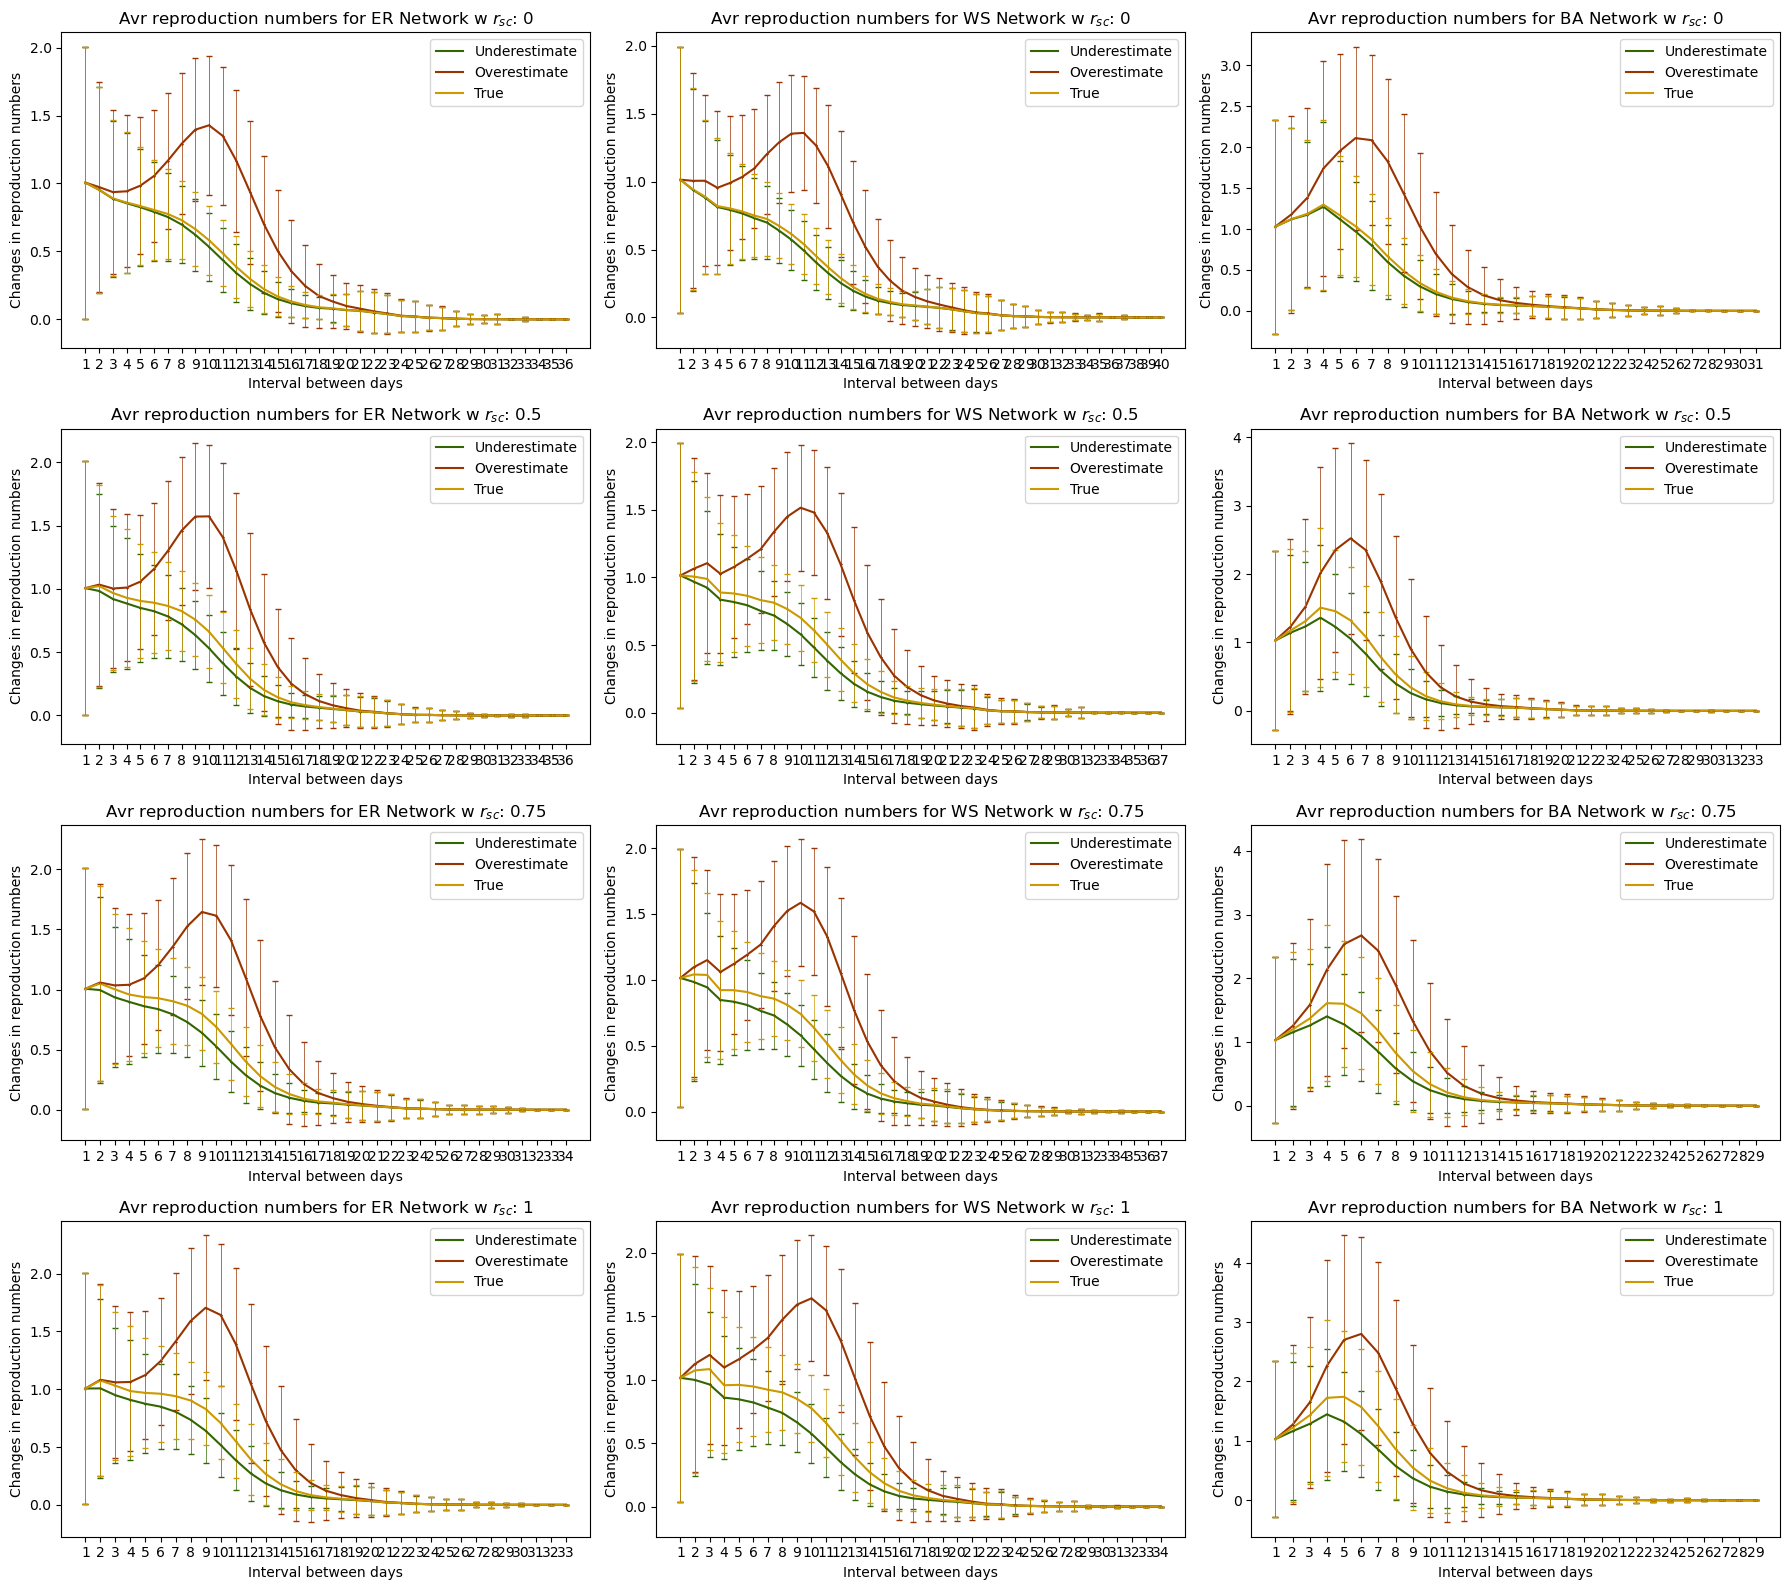

In [15]:
# 2b. Plot individual graphs with diff r triangle. 

fig, axs = plt.subplots(4, 3, figsize = (18,16))

for k in range(4):
    ######### For ER Network #########
    axs[k][0].plot(ER_2b_data[k][0], ER_2b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][0].plot(ER_2b_data[k][0], ER_2b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][0].plot(ER_2b_data[k][0], ER_2b_data[k][3], label  = "True", color = '#cc9900')
    
    axs[k][0].errorbar(ER_2b_data[k][0], ER_2b_data[k][1], yerr = ER_2b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][0].errorbar(ER_2b_data[k][0], ER_2b_data[k][2], yerr = ER_2b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][0].errorbar(ER_2b_data[k][0], ER_2b_data[k][3], yerr = ER_2b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][0].set_xticks(np.arange(1, len(ER_2b_data[k][0])+1, 1))
    
    ER_title_label= "Avr reproduction numbers for ER Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][0].set_title(ER_title_label)
    axs[k][0].set_xlabel("Interval between days")
    axs[k][0].set_ylabel("Changes in reproduction numbers")
    axs[k][0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[k][1].plot(WS_2b_data[k][0], WS_2b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][1].plot(WS_2b_data[k][0], WS_2b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][1].plot(WS_2b_data[k][0], WS_2b_data[k][3], label  = "True", color = '#cc9900')

    axs[k][1].errorbar(WS_2b_data[k][0], WS_2b_data[k][1], yerr = WS_2b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][1].errorbar(WS_2b_data[k][0], WS_2b_data[k][2], yerr = WS_2b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][1].errorbar(WS_2b_data[k][0], WS_2b_data[k][3], yerr = WS_2b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][1].set_xticks(np.arange(1, len(WS_2b_data[k][0])+1, 1))
    
    WS_title_label= "Avr reproduction numbers for WS Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][1].set_title(WS_title_label)
    axs[k][1].set_xlabel("Interval between days")
    axs[k][1].set_ylabel("Changes in reproduction numbers")
    axs[k][1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[k][2].plot(BA_2b_data[k][0], BA_2b_data[k][1], label  = "Underestimate", color = '#336600')
    axs[k][2].plot(BA_2b_data[k][0], BA_2b_data[k][2], label  = "Overestimate", color = '#993300')
    axs[k][2].plot(BA_2b_data[k][0], BA_2b_data[k][3], label  = "True", color = '#cc9900')

    axs[k][2].errorbar(BA_2b_data[k][0], BA_2b_data[k][1], yerr = BA_2b_data[k][4],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
    axs[k][2].errorbar(BA_2b_data[k][0], BA_2b_data[k][2], yerr = BA_2b_data[k][5],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
    axs[k][2].errorbar(BA_2b_data[k][0], BA_2b_data[k][3], yerr = BA_2b_data[k][6],\
                       fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')
    
    axs[k][2].set_xticks(np.arange(1, len(BA_2b_data[k][0])+1, 1))
    
    BA_title_label= "Avr reproduction numbers for BA Network w $r_{sc}$: " + str(r_triangle_set[k])    
    axs[k][2].set_title(BA_title_label)
    axs[k][2].set_xlabel("Interval between days")
    axs[k][2].set_ylabel("Changes in reproduction numbers")
    axs[k][2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

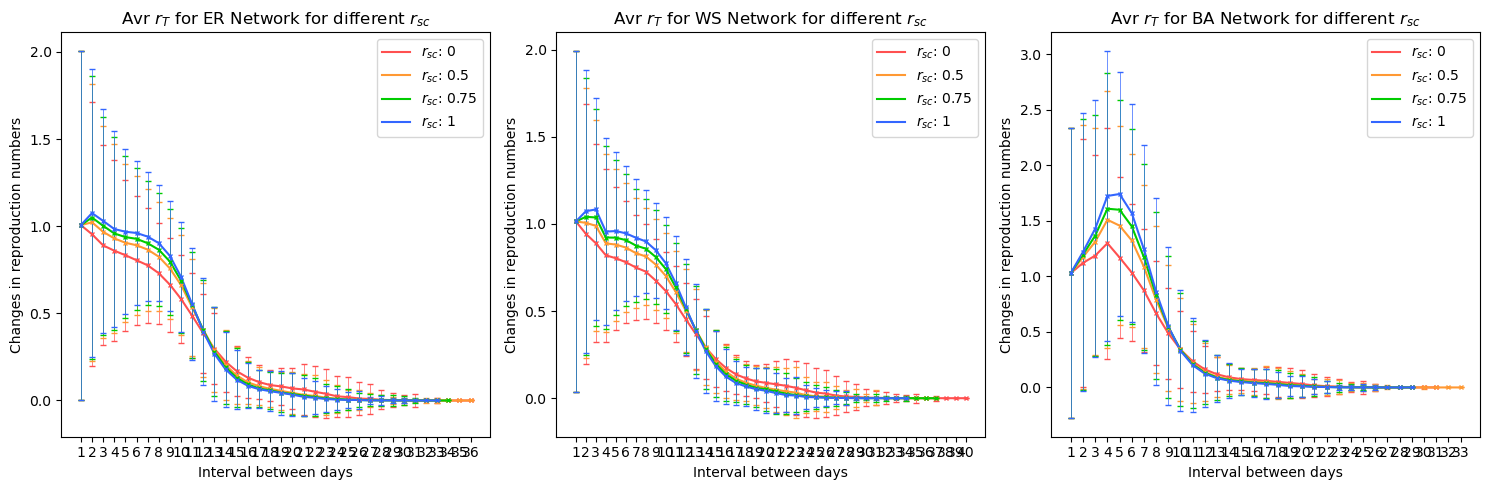

In [17]:
# 2a. Plot only r_T for each network and compare between networks
fig, axs = plt.subplots(1, 3, figsize = (15,5))
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
T_end_ER = max(len(ER_2b_data[0][0]), len(ER_2b_data[1][0]), len(ER_2b_data[2][0]), len(ER_2b_data[3][0]))
T_end_WS = max(len(WS_2b_data[0][0]), len(WS_2b_data[1][0]), len(WS_2b_data[2][0]), len(WS_2b_data[3][0]))
T_end_BA = max(len(BA_2b_data[0][0]), len(BA_2b_data[1][0]), len(BA_2b_data[2][0]), len(BA_2b_data[3][0]))

for k in range(4):
    plot_label = "$r_{sc}$: "+ str(r_triangle_set[k]) 
    ######### For ER Network #########
    axs[0].plot(ER_2b_data[k][0], ER_2b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[0].errorbar(ER_2b_data[k][0], ER_2b_data[k][3], yerr = ER_2b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k]) 
    
    axs[0].set_xticks(np.arange(1, T_end_ER + 1, 1))
    
    ER_title_label= "Avr $r_T$ for ER Network for different $r_{sc}$"   
    axs[0].set_title(ER_title_label)
    axs[0].set_xlabel("Interval between days")
    axs[0].set_ylabel("Changes in reproduction numbers")
    axs[0].legend(loc = 1)
    
    ######### For WS Network #########
    axs[1].plot(WS_2b_data[k][0], WS_2b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[1].errorbar(WS_2b_data[k][0], WS_2b_data[k][3], yerr = WS_2b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[1].set_xticks(np.arange(1, T_end_WS + 1, 1))
    
    WS_title_label= "Avr $r_T$ for WS Network for different $r_{sc}$"   
    axs[1].set_title(WS_title_label)
    axs[1].set_xlabel("Interval between days")
    axs[1].set_ylabel("Changes in reproduction numbers")
    axs[1].legend(loc = 1)
    
    ######### For BA Network #########
    axs[2].plot(BA_2b_data[k][0], BA_2b_data[k][3], label  = plot_label, color = plot_colors[k])
    axs[2].errorbar(BA_2b_data[k][0], BA_2b_data[k][3], yerr = BA_2b_data[k][6],\
                   fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k])   
    axs[2].set_xticks(np.arange(1, T_end_BA + 1, 1))
    
    BA_title_label= "Avr $r_T$ for BA Network for different $r_{sc}$"   
    axs[2].set_title(BA_title_label)
    axs[2].set_xlabel("Interval between days")
    axs[2].set_ylabel("Changes in reproduction numbers")
    axs[2].legend(loc = 1)
    
plt.tight_layout()
plt.show()

#### <u> Part 3.Comparing D recover: 1, 3, 5 for rl = 2

In [18]:
#FOR D = 1
location_3a = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (3) Comparing D = 1, 3, 5 for SC = 0.5, 0.75, 1 for rl = 1 and 2 [Show SC only comes in at later part]\For rl = 2\D = 1, rl = 2, test diff r_tri"
ER_3a_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_3a_data = []
BA_3a_data = []

file_names_ER_3a = ["\ER_avr_simplex_D1_rl2_r_tri_none", "\ER_avr_simplex_D1_rl2_r_tri_0.5", \
                "\ER_avr_simplex_D1_rl2_r_tri_0.75", "\ER_avr_simplex_D1_rl2_r_tri_1"]

file_names_WS_3a = ["\WS_avr_simplex_D1_rl2_r_tri_none", "\WS_avr_simplex_D1_rl2_r_tri_0.5", \
                "\WS_avr_simplex_D1_rl2_r_tri_0.75", "\WS_avr_simplex_D1_rl2_r_tri_1"]

file_names_BA_3a = ["\BA_avr_simplex_D1_rl2_r_tri_none", "\BA_avr_simplex_D1_rl2_r_tri_0.5", \
                "\BA_avr_simplex_D1_rl2_r_tri_0.75", "\BA_avr_simplex_D1_rl2_r_tri_1"]

for j in range(4):
    ER_3a_data.append(csv_file_opener(location_3a, file_names_ER_3a[j]))
    WS_3a_data.append(csv_file_opener(location_3a, file_names_WS_3a[j]))
    BA_3a_data.append(csv_file_opener(location_3a, file_names_BA_3a[j]))
    
#FOR D = 5
location_3b = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (3) Comparing D = 1, 3, 5 for SC = 0.5, 0.75, 1 for rl = 1 and 2 [Show SC only comes in at later part]\For rl = 2\D = 5, rl = 2, test diff r_tri"
ER_3b_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_3b_data = []
BA_3b_data = []

file_names_ER_3b = ["\ER_avr_simplex_D5_rl2_r_tri_none", "\ER_avr_simplex_D5_rl2_r_tri_0.5", \
                "\ER_avr_simplex_D5_rl2_r_tri_0.75", "\ER_avr_simplex_D5_rl2_r_tri_1"]

file_names_WS_3b = ["\WS_avr_simplex_D5_rl2_r_tri_none", "\WS_avr_simplex_D5_rl2_r_tri_0.5", \
                "\WS_avr_simplex_D5_rl2_r_tri_0.75", "\WS_avr_simplex_D5_rl2_r_tri_1"]

file_names_BA_3b = ["\BA_avr_simplex_D5_rl2_r_tri_none", "\BA_avr_simplex_D5_rl2_r_tri_0.5", \
                "\BA_avr_simplex_D5_rl2_r_tri_0.75", "\BA_avr_simplex_D5_rl2_r_tri_1"]

for j in range(4):
    ER_3b_data.append(csv_file_opener(location_3b, file_names_ER_3b[j]))
    WS_3b_data.append(csv_file_opener(location_3b, file_names_WS_3b[j]))
    BA_3b_data.append(csv_file_opener(location_3b, file_names_BA_3b[j]))    


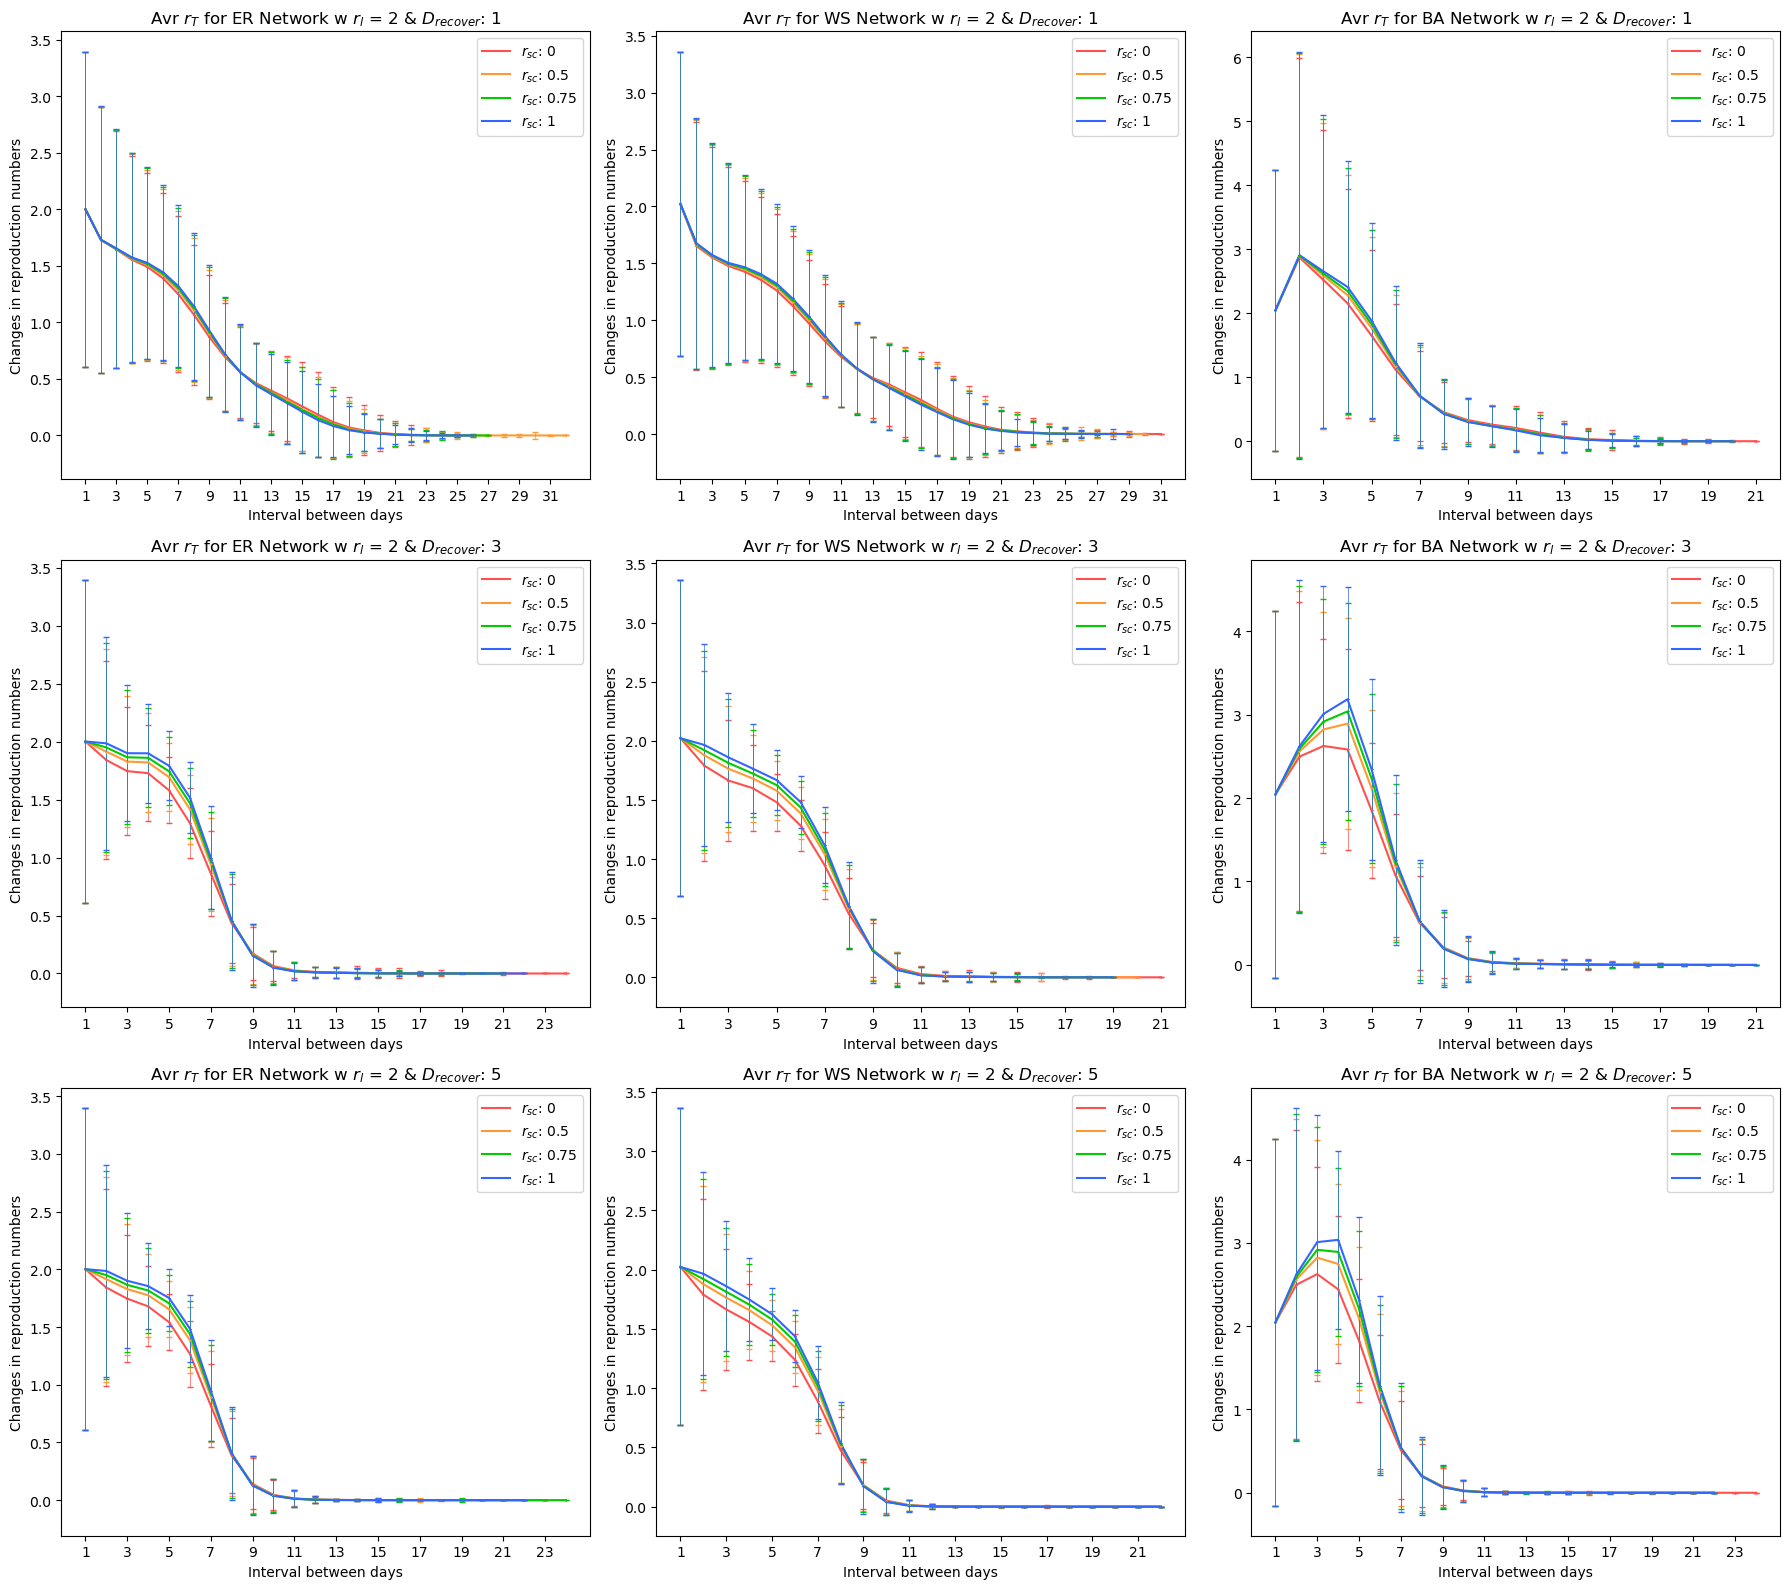

In [19]:
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff']
ER_data_diff_D = np.array([ER_3a_data, ER_2a_data, ER_3b_data])
T_max_ER_D1 = len(max(list(np.transpose(ER_data_diff_D[0])[0]), key = len))
T_max_ER_D3 = len(max(list(np.transpose(ER_data_diff_D[1])[0]), key = len))
T_max_ER_D5 = len(max(list(np.transpose(ER_data_diff_D[2])[0]), key = len))
ER_time_diff_D = [T_max_ER_D1, T_max_ER_D3, T_max_ER_D5]

WS_data_diff_D = np.array([WS_3a_data, WS_2a_data, WS_3b_data])
T_max_WS_D1 = len(max(list(np.transpose(WS_data_diff_D[0])[0]), key = len))
T_max_WS_D3 = len(max(list(np.transpose(WS_data_diff_D[1])[0]), key = len))
T_max_WS_D5 = len(max(list(np.transpose(WS_data_diff_D[2])[0]), key = len))
WS_time_diff_D = [T_max_WS_D1, T_max_WS_D3, T_max_WS_D5]

BA_data_diff_D = np.array([BA_3a_data, BA_2a_data, BA_3b_data])
T_max_BA_D1 = len(max(list(np.transpose(BA_data_diff_D[0])[0]), key = len))
T_max_BA_D3 = len(max(list(np.transpose(BA_data_diff_D[1])[0]), key = len))
T_max_BA_D5 = len(max(list(np.transpose(BA_data_diff_D[2])[0]), key = len))
BA_time_diff_D = [T_max_BA_D1, T_max_BA_D3, T_max_BA_D5]


fig, axs = plt.subplots(3, 3, figsize = (18,16)) #color = '#993300'
D_recovery_set = [1, 3, 5]

#### For ER network
for q in range (len(D_recovery_set)):
    for k in range(4):
        plot_label = "$r_{sc}$: " + str(r_triangle_set[k])
        ############### FOR ER NETWORK ########################
        axs[q][0].plot(ER_data_diff_D[q][k][0],ER_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][0].errorbar(ER_data_diff_D[q][k][0], ER_data_diff_D[q][k][3], yerr = ER_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        ER_title_label= "Avr $r_T$ for ER Network w $r_l$ = 2 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][0].set_xticks(np.arange(1, ER_time_diff_D[q] + 1, 2))
        axs[q][0].set_title(ER_title_label)
        axs[q][0].set_xlabel("Interval between days")
        axs[q][0].set_ylabel("Changes in reproduction numbers")
        axs[q][0].legend(loc = 1)
        
        ############### FOR WS NETWORK ########################
        
        axs[q][1].plot(WS_data_diff_D[q][k][0],WS_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][1].errorbar(WS_data_diff_D[q][k][0], WS_data_diff_D[q][k][3], yerr = WS_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        WS_title_label= "Avr $r_T$ for WS Network w $r_l$ = 2 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][1].set_xticks(np.arange(1, WS_time_diff_D[q] + 1, 2))
        axs[q][1].set_title(WS_title_label)
        axs[q][1].set_xlabel("Interval between days")
        axs[q][1].set_ylabel("Changes in reproduction numbers")
        axs[q][1].legend(loc = 1)
        
        ############### FOR BA NETWORK ########################
        
        axs[q][2].plot(BA_data_diff_D[q][k][0], BA_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][2].errorbar(BA_data_diff_D[q][k][0], BA_data_diff_D[q][k][3], yerr = BA_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        BA_title_label= "Avr $r_T$ for BA Network w $r_l$ = 2 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][2].set_xticks(np.arange(1, BA_time_diff_D[q] + 1, 2))
        axs[q][2].set_title(BA_title_label)
        axs[q][2].set_xlabel("Interval between days")
        axs[q][2].set_ylabel("Changes in reproduction numbers")
        axs[q][2].legend(loc = 1)

plt.tight_layout()
plt.show()


#### <u> Part 3.Comparing D recover: 1, 3, 5 for rl = 1

In [20]:
#FOR D = 1
location_3c = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (3) Comparing D = 1, 3, 5 for SC = 0.5, 0.75, 1 for rl = 1 and 2 [Show SC only comes in at later part]\For rl = 1\D = 1, rl = 1, test diff r_tri"
ER_3c_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_3c_data = []
BA_3c_data = []

file_names_ER_3c = ["\ER_avr_simplex_D1_rl1_r_tri_none", "\ER_avr_simplex_D1_rl1_r_tri_0.5", \
                "\ER_avr_simplex_D1_rl1_r_tri_0.75", "\ER_avr_simplex_D1_rl1_r_tri_1"]

file_names_WS_3c = ["\WS_avr_simplex_D1_rl1_r_tri_none", "\WS_avr_simplex_D1_rl1_r_tri_0.5", \
                "\WS_avr_simplex_D1_rl1_r_tri_0.75", "\WS_avr_simplex_D1_rl1_r_tri_1"]

file_names_BA_3c = ["\BA_avr_simplex_D1_rl1_r_tri_none", "\BA_avr_simplex_D1_rl1_r_tri_0.5", \
                "\BA_avr_simplex_D1_rl1_r_tri_0.75", "\BA_avr_simplex_D1_rl1_r_tri_1"]

for j in range(4):
    ER_3c_data.append(csv_file_opener(location_3c, file_names_ER_3c[j]))
    WS_3c_data.append(csv_file_opener(location_3c, file_names_WS_3c[j]))
    BA_3c_data.append(csv_file_opener(location_3c, file_names_BA_3c[j]))
    
#FOR D = 5
location_3d = r"C:\Users\lione\Desktop\Y4S2\PH4421 FYP\Data for simplicial complex\Part (3) Comparing D = 1, 3, 5 for SC = 0.5, 0.75, 1 for rl = 1 and 2 [Show SC only comes in at later part]\For rl = 1\D = 5, rl = 1, test diff r_tri"
ER_3d_data = [] #index 0: no simplex, 1: 0.5, and so on
WS_3d_data = []
BA_3d_data = []

file_names_ER_3d = ["\ER_avr_simplex_D5_rl1_r_tri_none", "\ER_avr_simplex_D5_rl1_r_tri_0.5", \
                "\ER_avr_simplex_D5_rl1_r_tri_0.75", "\ER_avr_simplex_D5_rl1_r_tri_1"]

file_names_WS_3d = ["\WS_avr_simplex_D5_rl1_r_tri_none", "\WS_avr_simplex_D5_rl1_r_tri_0.5", \
                "\WS_avr_simplex_D5_rl1_r_tri_0.75", "\WS_avr_simplex_D5_rl1_r_tri_1"]

file_names_BA_3d = ["\BA_avr_simplex_D5_rl1_r_tri_none", "\BA_avr_simplex_D5_rl1_r_tri_0.5", \
                "\BA_avr_simplex_D5_rl1_r_tri_0.75", "\BA_avr_simplex_D5_rl1_r_tri_1"]

for j in range(4):
    ER_3d_data.append(csv_file_opener(location_3d, file_names_ER_3d[j]))
    WS_3d_data.append(csv_file_opener(location_3d, file_names_WS_3d[j]))
    BA_3d_data.append(csv_file_opener(location_3d, file_names_BA_3d[j]))  

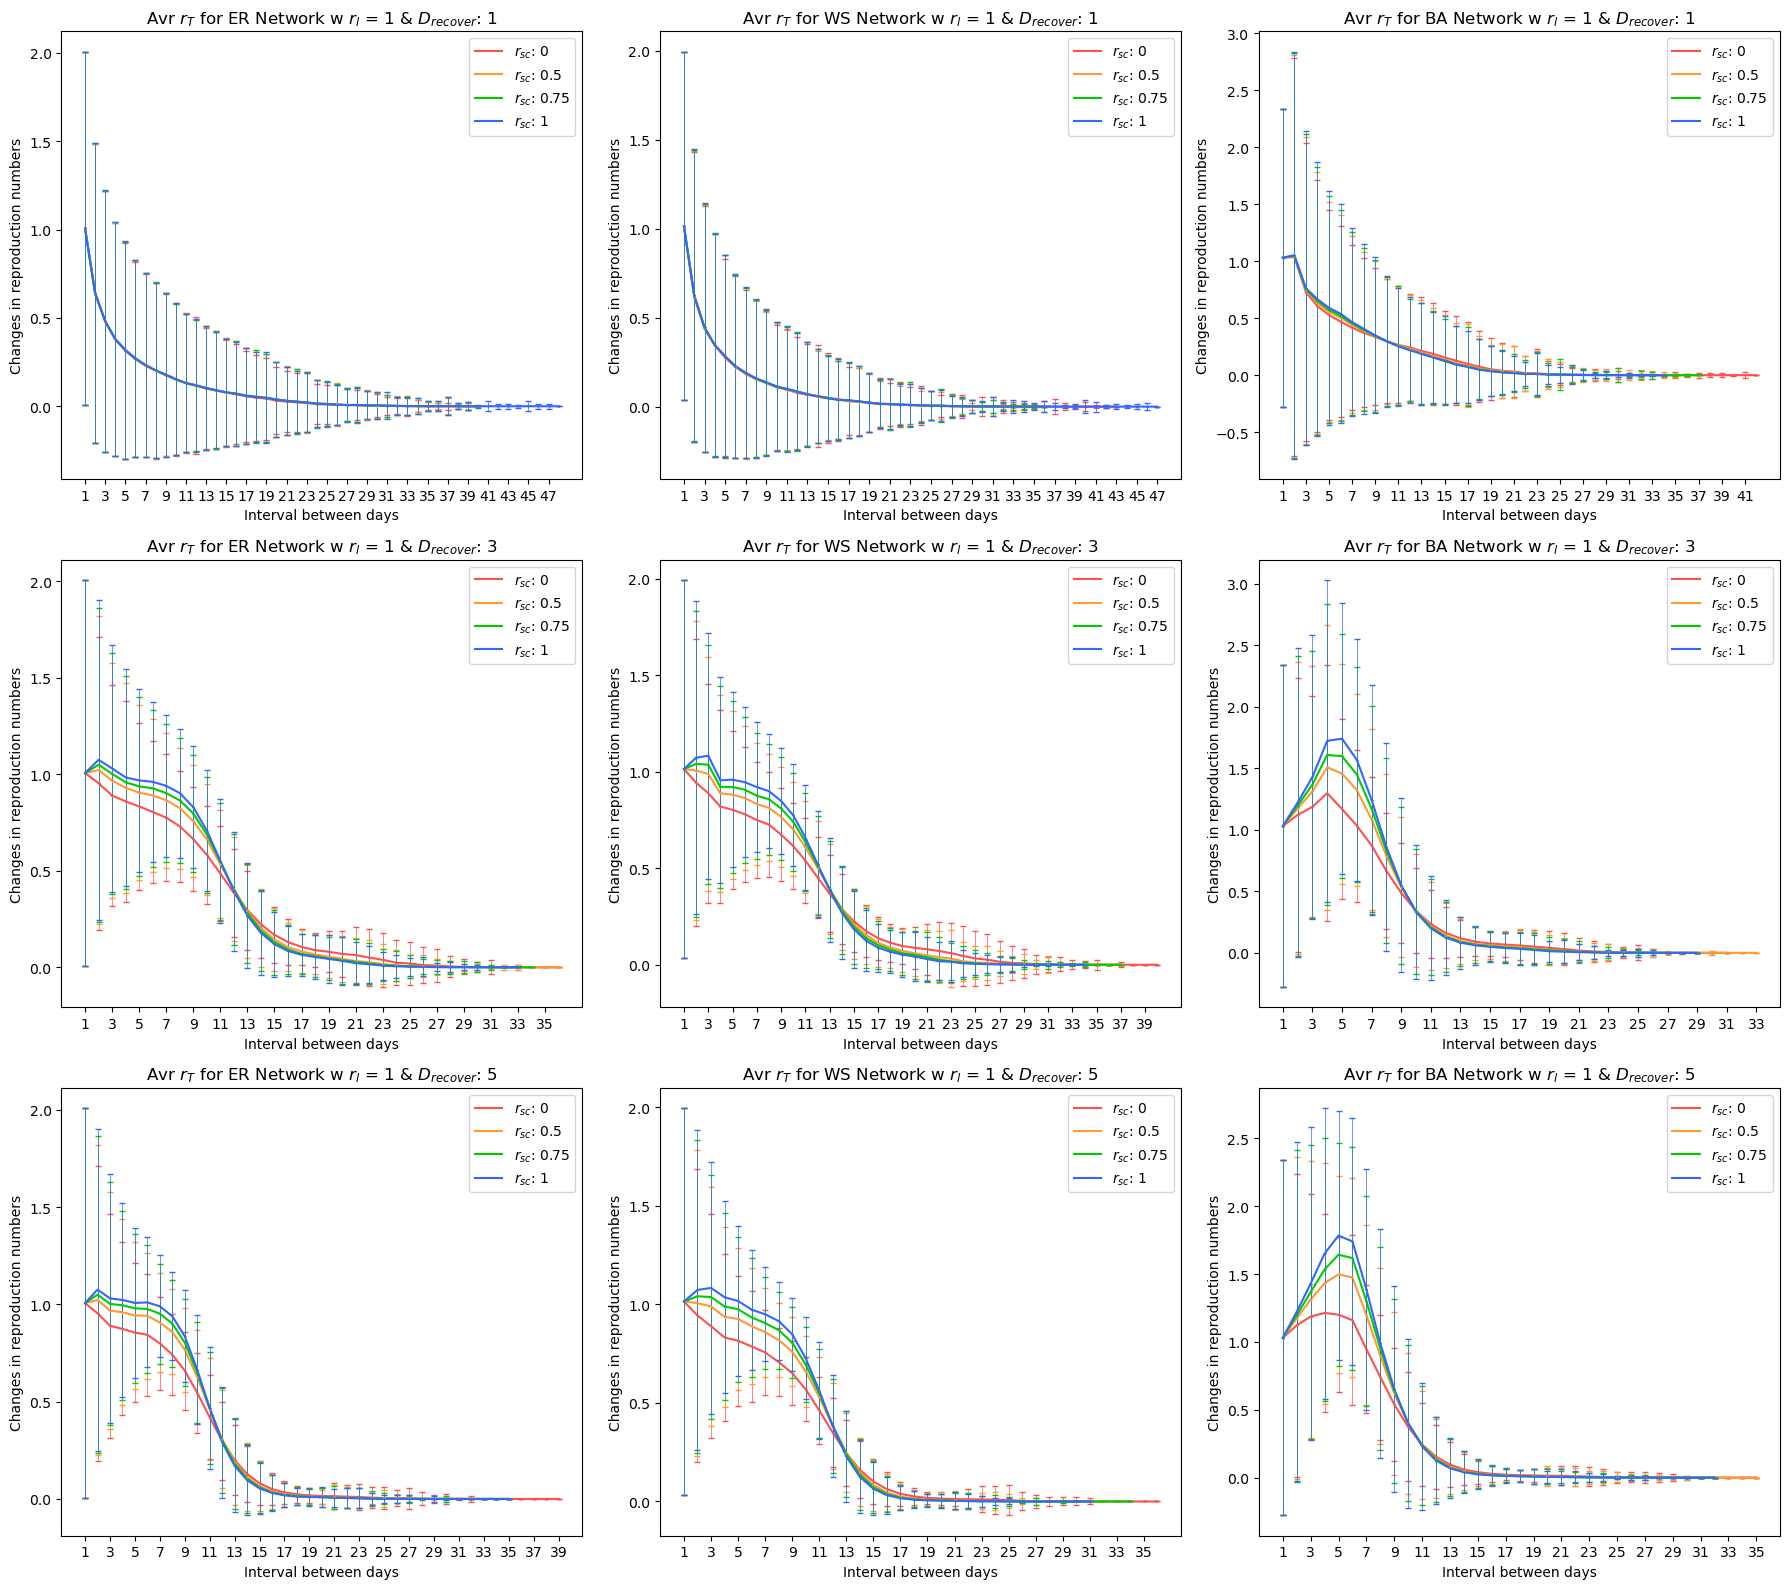

In [21]:
plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff']
ER_data_diff_D = np.array([ER_3c_data, ER_2b_data, ER_3d_data])
T_max_ER_D1 = len(max(list(np.transpose(ER_data_diff_D[0])[0]), key = len))
T_max_ER_D3 = len(max(list(np.transpose(ER_data_diff_D[1])[0]), key = len))
T_max_ER_D5 = len(max(list(np.transpose(ER_data_diff_D[2])[0]), key = len))
ER_time_diff_D = [T_max_ER_D1, T_max_ER_D3, T_max_ER_D5]

WS_data_diff_D = np.array([WS_3c_data, WS_2b_data, WS_3d_data])
T_max_WS_D1 = len(max(list(np.transpose(WS_data_diff_D[0])[0]), key = len))
T_max_WS_D3 = len(max(list(np.transpose(WS_data_diff_D[1])[0]), key = len))
T_max_WS_D5 = len(max(list(np.transpose(WS_data_diff_D[2])[0]), key = len))
WS_time_diff_D = [T_max_WS_D1, T_max_WS_D3, T_max_WS_D5]

BA_data_diff_D = np.array([BA_3c_data, BA_2b_data, BA_3d_data])
T_max_BA_D1 = len(max(list(np.transpose(BA_data_diff_D[0])[0]), key = len))
T_max_BA_D3 = len(max(list(np.transpose(BA_data_diff_D[1])[0]), key = len))
T_max_BA_D5 = len(max(list(np.transpose(BA_data_diff_D[2])[0]), key = len))
BA_time_diff_D = [T_max_BA_D1, T_max_BA_D3, T_max_BA_D5]


fig, axs = plt.subplots(3, 3, figsize = (18,16)) #color = '#993300'
D_recovery_set = [1, 3, 5]

for q in range (len(D_recovery_set)):
    for k in range(4):
        plot_label = "$r_{sc}$: " + str(r_triangle_set[k])
        ############### FOR ER NETWORK ########################
        axs[q][0].plot(ER_data_diff_D[q][k][0],ER_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][0].errorbar(ER_data_diff_D[q][k][0], ER_data_diff_D[q][k][3], yerr = ER_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        ER_title_label= "Avr $r_T$ for ER Network w $r_l$ = 1 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][0].set_xticks(np.arange(1, ER_time_diff_D[q] + 1, 2))
        axs[q][0].set_title(ER_title_label)
        axs[q][0].set_xlabel("Interval between days")
        axs[q][0].set_ylabel("Changes in reproduction numbers")
        axs[q][0].legend(loc = 1)
        
        ############### FOR WS NETWORK ########################
        
        axs[q][1].plot(WS_data_diff_D[q][k][0],WS_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][1].errorbar(WS_data_diff_D[q][k][0], WS_data_diff_D[q][k][3], yerr = WS_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        WS_title_label= "Avr $r_T$ for WS Network w $r_l$ = 1 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][1].set_xticks(np.arange(1, WS_time_diff_D[q] + 1, 2))
        axs[q][1].set_title(WS_title_label)
        axs[q][1].set_xlabel("Interval between days")
        axs[q][1].set_ylabel("Changes in reproduction numbers")
        axs[q][1].legend(loc = 1)
        
        ############### FOR BA NETWORK ########################
        
        axs[q][2].plot(BA_data_diff_D[q][k][0], BA_data_diff_D[q][k][3] , label = plot_label, color = plot_colors[k])
        axs[q][2].errorbar(BA_data_diff_D[q][k][0], BA_data_diff_D[q][k][3], yerr = BA_data_diff_D[q][k][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])

        BA_title_label= "Avr $r_T$ for BA Network w $r_l$ = 1 & $D_{recover}$: " + str(D_recovery_set[q])   

        axs[q][2].set_xticks(np.arange(1, BA_time_diff_D[q] + 1, 2))
        axs[q][2].set_title(BA_title_label)
        axs[q][2].set_xlabel("Interval between days")
        axs[q][2].set_ylabel("Changes in reproduction numbers")
        axs[q][2].legend(loc = 1)

plt.tight_layout()
plt.show()


In [23]:
print(len(ER_data_diff_D))

3


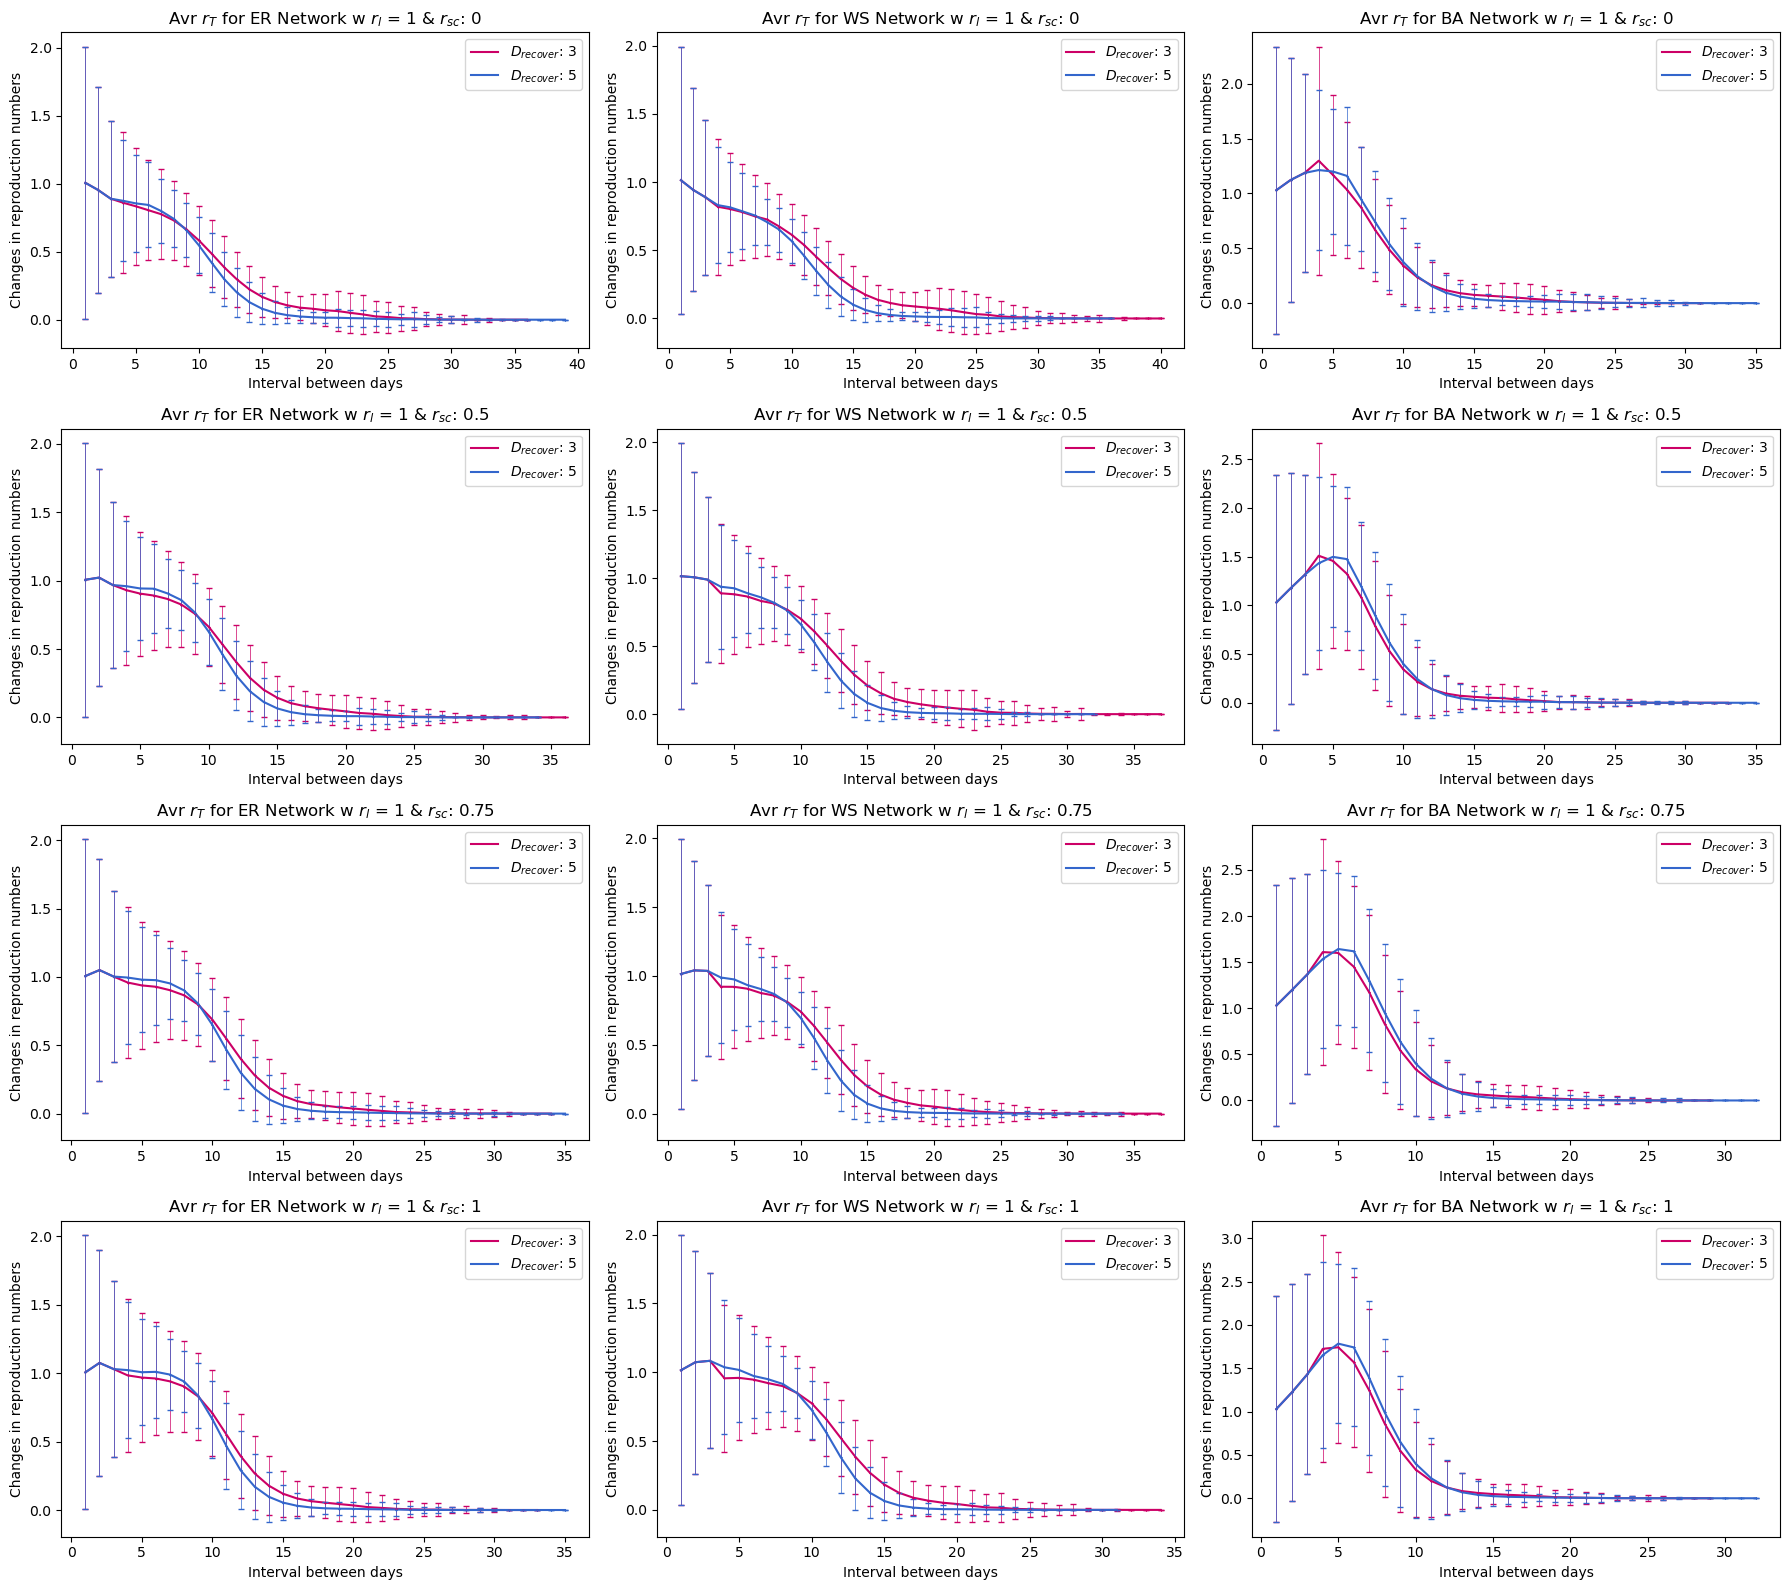

In [41]:
### THESE PLOTS WILL TELL ME THAT SC HAS NO IMPACT EVEN IF D INCREASE
fig, axs = plt.subplots(4, 3, figsize = (18,16)) #color = '#993300'
D_recovery_set = [1, 3, 5]
color_contrast = ['#cc0066', '#3366cc']

for b in range (2):
    for q in range(4):
        ############### FOR ER NETWORK ########################
        plot_label = '$D_{recover}$: ' + str(D_recovery_set[b+1])
        axs[q][0].plot(ER_data_diff_D[b+1][q][0],ER_data_diff_D[b+1][q][3] , label = plot_label, color = color_contrast[b])
        axs[q][0].errorbar(ER_data_diff_D[b+1][q][0], ER_data_diff_D[b+1][q][3], yerr = ER_data_diff_D[b+1][q][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = color_contrast[b])
  
        ER_title_label = "Avr $r_T$ for ER Network w $r_l$ = 1 & $r_{sc}$: " + str(r_triangle_set[q])
        axs[q][0].set_title(ER_title_label)
        axs[q][0].set_xlabel("Interval between days")
        axs[q][0].set_ylabel("Changes in reproduction numbers")
        axs[q][0].legend(loc = 1)

        ############### FOR WS NETWORK ########################
        plot_label = '$D_{recover}$: ' + str(D_recovery_set[b+1])
        axs[q][1].plot(WS_data_diff_D[b+1][q][0],WS_data_diff_D[b+1][q][3] , label = plot_label, color = color_contrast[b])
        axs[q][1].errorbar(WS_data_diff_D[b+1][q][0], WS_data_diff_D[b+1][q][3], yerr = WS_data_diff_D[b+1][q][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = color_contrast[b])
  
        WS_title_label = "Avr $r_T$ for WS Network w $r_l$ = 1 & $r_{sc}$: " + str(r_triangle_set[q])
        axs[q][1].set_title(WS_title_label)
        axs[q][1].set_xlabel("Interval between days")
        axs[q][1].set_ylabel("Changes in reproduction numbers")
        axs[q][1].legend(loc = 1)
        
        ############### FOR BA NETWORK ########################
        plot_label = '$D_{recover}$: ' + str(D_recovery_set[b+1])
        axs[q][2].plot(BA_data_diff_D[b+1][q][0],BA_data_diff_D[b+1][q][3] , label = plot_label, color = color_contrast[b])
        axs[q][2].errorbar(BA_data_diff_D[b+1][q][0], BA_data_diff_D[b+1][q][3], yerr = BA_data_diff_D[b+1][q][6],\
                           fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = color_contrast[b])
  
        BA_title_label = "Avr $r_T$ for BA Network w $r_l$ = 1 & $r_{sc}$: " + str(r_triangle_set[q])
        axs[q][2].set_title(BA_title_label)
        axs[q][2].set_xlabel("Interval between days")
        axs[q][2].set_ylabel("Changes in reproduction numbers")
        axs[q][2].legend(loc = 1)
        
    
plt.tight_layout()
plt.show()

In [23]:
# i = 2
# for k in range(4):
#     plot_label = "$r_{sc}$: " + str(r_triangle_set[k])
#     ############### FOR ER NETWORK ########################
#     plt.plot(BA_data_diff_D[i][k][0],BA_data_diff_D[i][k][3] , label = plot_label, color = plot_colors[k])
#     plt.errorbar(BA_data_diff_D[i][k][0], BA_data_diff_D[i][k][3], yerr = BA_data_diff_D[i][k][6],\
#                        fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = plot_colors[k])
#     plt.xticks(np.arange(1, BA_time_diff_D[i] + 1, 2))
    
#     BA_title_label= "Avr $r_T$ for BA Network w $r_l$ = 1 & $D_{recover}$: " + str(D_recovery_set[i])   
#     plt.title(BA_title_label)
#     plt.xlabel("Interval between days")
#     plt.ylabel("Changes in reproduction numbers")
#     plt.legend(loc = 1)
    
# plt.savefig("Avr r_T for BA network with D" + str(D_recovery_set[i]) + ".png", dpi = 500)
# plt.show()

In [37]:
# T_end_testing_0 = max(len(ER_1a_data[0][0]), len(ER_2a_data[0][0]), len(ER_2b_data[0][0]))
# T_end_testing_1 = max(len(ER_1a_data[1][0]), len(ER_2a_data[1][0]), len(ER_2b_data[1][0]))

# fig, axs = plt.subplots(1, 2, figsize = (15,5))

# axs[0].plot(ER_1a_data[0][0], ER_1a_data[0][3], label = 'rl = 3', linewidth = 0.8)
# axs[0].plot(ER_2a_data[0][0], ER_2a_data[0][3], label = 'rl = 2', linewidth = 0.8)
# axs[0].plot(ER_2b_data[0][0], ER_2b_data[0][3], label = 'rl = 1', linewidth = 0.8)
# axs[0].set_xticks(np.arange(1, T_end_testing_0, 2))

# axs[0].plot(ER_1a_data[1][0], ER_1a_data[1][3], label = 'rl = 3', linewidth = 0.8)
# axs[0].plot(ER_2a_data[1][0], ER_2a_data[1][3], label = 'rl = 2', linewidth = 0.8)
# axs[0].plot(ER_2b_data[1][0], ER_2b_data[1][3], label = 'rl = 1', linewidth = 0.8)
# axs[0].set_xticks(np.arange(1, T_end_testing_1, 2))

# axs[0].plot(ER_1a_data[2][0], ER_1a_data[2][3], label = 'rl = 3', linewidth = 0.8)
# axs[0].plot(ER_2a_data[2][0], ER_2a_data[2][3], label = 'rl = 2', linewidth = 0.8)
# axs[0].plot(ER_2b_data[2][0], ER_2b_data[2][3], label = 'rl = 1', linewidth = 0.8)

# axs[0].plot(ER_1a_data[3][0], ER_1a_data[3][3], label = 'rl = 3', linewidth = 0.8)
# axs[0].plot(ER_2a_data[3][0], ER_2a_data[3][3], label = 'rl = 2', linewidth = 0.8)
# axs[0].plot(ER_2b_data[3][0], ER_2b_data[3][3], label = 'rl = 1', linewidth = 0.8)

# plt.legend()
# plt.show()

In [ ]:
############################### For saving the plots (w all plots) ##################################
# k = 3
# plt.plot(ER_1b_data[k][0], ER_1b_data[k][1], label  = "Underestimate", color = '#336600')
# plt.plot(ER_1b_data[k][0], ER_1b_data[k][2], label  = "Overestimate", color = '#993300')
# plt.plot(ER_1b_data[k][0], ER_1b_data[k][3], label  = "True", color = '#cc9900')

# plt.errorbar(ER_1b_data[k][0], ER_1b_data[k][1], yerr = ER_1b_data[k][4],\
#                    fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#336600')
# plt.errorbar(ER_1b_data[k][0], ER_1b_data[k][2], yerr = ER_1b_data[k][5],\
#                    fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#993300')
# plt.errorbar(ER_1b_data[k][0], ER_1b_data[k][3], yerr = ER_1b_data[k][6],\
#                    fmt = 'x', markersize = 1, elinewidth = 0.5, capsize = 2, color = '#cc9900')

# plt.xticks(np.arange(1, len(ER_1b_data[k][0])+1, 1))

# title_label= "Avr reproduction numbers for ER Network w $r_{sc}$: " + str(r_triangle_set[k])
# plt.title(title_label)
# plt.xlabel("Interval between days")
# plt.ylabel("Changes in reproduction numbers")
# plt.legend(loc = 1)

# # plt.savefig(file_names_ER_1b[k][1:] + ".png", dpi = 500)
# plt.show()

In [ ]:
# 1a. Plot only r_T for each network and compare between networks

# plot_colors = ['#ff5050', '#ff9933', '#00cc00', '#3366ff'] 
# T_end_ER = max(len(ER_2b_data[0][0]), len(ER_2b_data[1][0]), len(ER_2b_data[2][0]), len(ER_2b_data[3][0]))
# T_end_WS = max(len(WS_2b_data[0][0]), len(WS_2b_data[1][0]), len(WS_2b_data[2][0]), len(WS_2b_data[3][0]))
# T_end_BA = max(len(BA_2b_data[0][0]), len(BA_2b_data[1][0]), len(BA_2b_data[2][0]), len(BA_2b_data[3][0]))

# for k in range(4):
#     plot_label = "$r_{sc}$: "+ str(r_triangle_set[k]) 
#     ######### For ER Network #########
#     plt.plot(ER_2b_data[k][0], ER_2b_data[k][3], label  = plot_label, color = plot_colors[k])
#     plt.errorbar(ER_2b_data[k][0], ER_2b_data[k][3], yerr = ER_2b_data[k][6],\
#                    fmt = 'x', markersize = 3, elinewidth = 0.5, capsize = 2, color = plot_colors[k]) 
    
#     plt.xticks(np.arange(1, T_end_ER + 1, 2))
    
#     ER_title_label= "Avr $r_T$ for ER Network for different $r_{sc}$"   
#     plt.title(ER_title_label)
#     plt.xlabel("Interval between days")
#     plt.ylabel("Changes in reproduction numbers")
#     plt.legend(loc = 1)
    
# plt.savefig("Comparision of r_T for ER network for diff r_tri", dpi = 500)
# plt.show()